In [1]:
!pip install easyocr opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 24.5 MB/s eta 0:00:00


In [7]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import re
from matplotlib import rcParams

# Define unit categories
unit_categories = {
    'length': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard', 'cm', 'CM'},
    'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard', 'cm', 'CM'},
    'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard', 'cm', 'CM'},
    'height': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard', 'cm', 'CM'},
    'item_weight': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton', 'g', 'kg', 'µg', 'mg', 'oz', 'lb', 'ton'},
    'maximum_weight_recommendation': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton', 'g', 'kg', 'µg', 'mg', 'oz', 'lb', 'ton'},
    'voltage': {'kilovolt', 'millivolt', 'volt', 'kv', 'mv', 'v'},
    'wattage': {'kilowatt', 'watt', 'w', 'KW', 'W', 'w'},
    'item_volume': {'centilitre', 'cubic foot', 'cubic inch', 'cup', 'decilitre', 'fluid ounce', 'gallon', 'imperial gallon', 'litre', 'microlitre', 'millilitre', 'pint', 'quart', 'cl', 'cf', 'in³', 'cup', 'dl', 'floz', 'gal', 'imp gal', 'l', 'µl', 'ml', 'pt', 'qt'}
}

def contains_units(term, units):
    return any(unit in term for unit in units)

def filter_terms_by_category(terms, category):
    units = unit_categories.get(category, set())
    return [term for term in terms if contains_units(term, units)]

def process_image_for_units(img, category):
    try:
        # Set figure size for matplotlib
        rcParams['figure.figsize'] = 8, 16

        if img is None:
            raise ValueError("Image is None")

        # Convert image to grayscale if not already
        if len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Preprocess the image
        img = cv2.fastNlMeansDenoising(img, None, 30, 7, 21)
        _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

        # Initialize EasyOCR reader
        reader = easyocr.Reader(['en'])

        # Read text from the image
        output = reader.readtext(img, detail=0)  # Using detail=0 to get text only

        # Combine all text segments into a single paragraph
        paragraph = ' '.join(output)
        paragraph = paragraph.lower()

        # Display the extracted paragraph
        print("Extracted Paragraph:")
        print(paragraph)

        # Function to extract words containing numeric characters and units
        def extract_words_with_numbers_and_units(text):
            # Regular expression to match numeric values and units
            pattern = re.compile(r'(\d+(\.\d+)?|\.\d+)\s*([a-zA-Z]+)')
            matches = pattern.findall(text)
            return [f'{number} {unit.lower()}' for number, _, unit in matches]

        # Extract words containing numeric characters and units from the paragraph
        words_with_numbers_and_units = extract_words_with_numbers_and_units(paragraph)

        # Display extracted words containing numeric characters and units
        print("\nWords Containing Numeric Characters and Units:")
        for word in words_with_numbers_and_units:
            print(word)

        # Display the preprocessed image (optional)
        plt.imshow(img, cmap='gray')
        plt.title('Preprocessed Image')
        plt.axis('off')
        plt.show()

        # Filter terms based on the selected category
        filtered_terms = filter_terms_by_category(words_with_numbers_and_units, category)
        print("\nFiltered Terms Based on Category '{}':".format(category))
        print(filtered_terms)

        return filtered_terms  # Return the filtered terms for DataFrame

    except Exception as e:
        print(f"Error processing image: {e}")
        return []  # Return an empty list in case of error

"""# Example usage
img_path = '/content/613G8GOyLSL.jpg'  # Path to your image
category = 'length'  # Category to filter
img = cv2.imread(img_path)  # Load the image
process_image_for_units(img, category)"""

"# Example usage\nimg_path = '/content/613G8GOyLSL.jpg'  # Path to your image\ncategory = 'length'  # Category to filter\nimg = cv2.imread(img_path)  # Load the image\nprocess_image_for_units(img, category)"

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

Extracted Paragraph:
20cm 15cm

Words Containing Numeric Characters and Units:
20 cm
15 cm


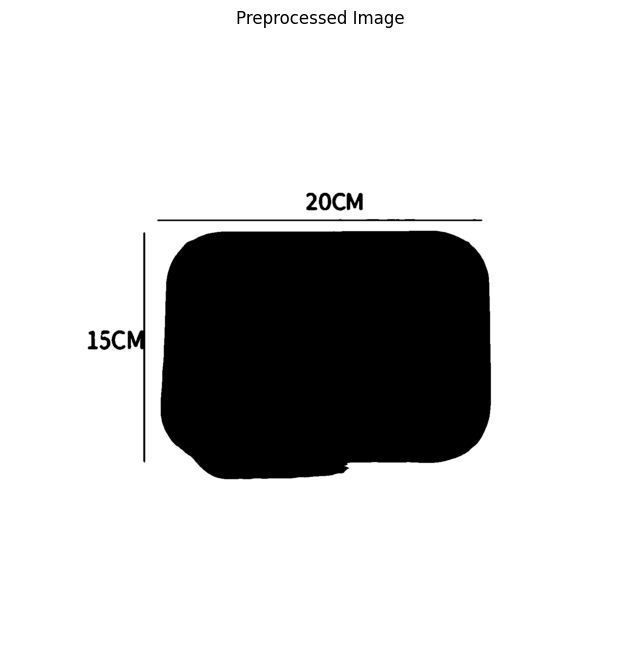


Filtered Terms Based on Category 'width':
['20 cm', '15 cm']


Extracted Paragraph:
20cm 15cm

Words Containing Numeric Characters and Units:
20 cm
15 cm


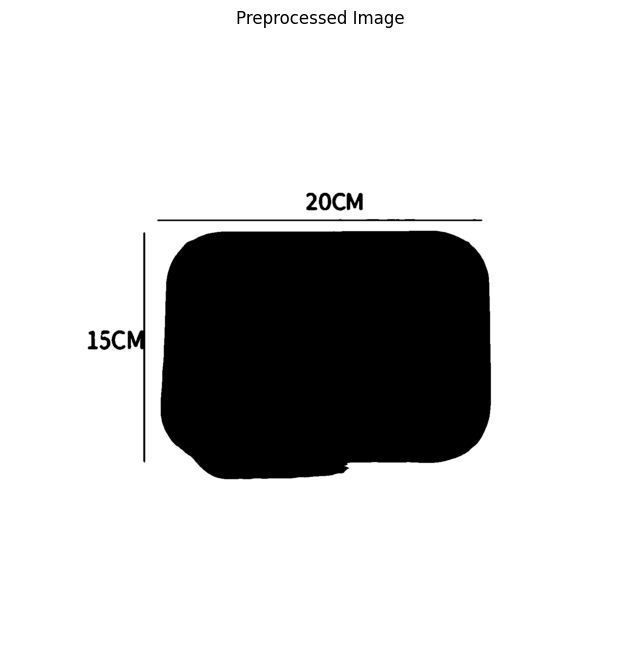


Filtered Terms Based on Category 'depth':
['20 cm', '15 cm']


Extracted Paragraph:
deodorizing module cat litter shovel ndorb hutal tubrtancet tad reduro odor rogardlers ottol and wood gand cryslal gjnd altez aoprod ct lttor illl} mit ui

Words Containing Numeric Characters and Units:


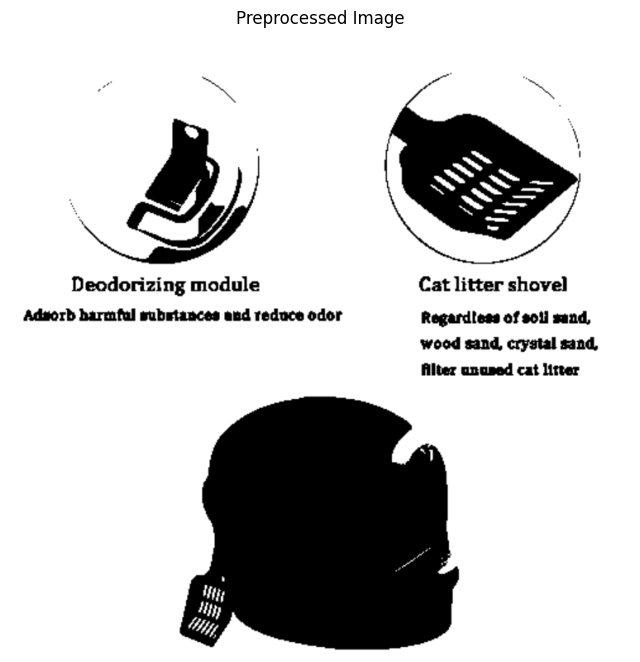


Filtered Terms Based on Category 'maximum_weight_recommendation':
[]


Extracted Paragraph:
professional tools

Words Containing Numeric Characters and Units:


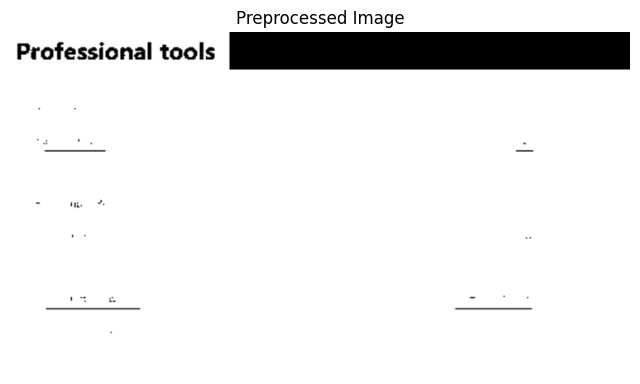


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
professional tools

Words Containing Numeric Characters and Units:


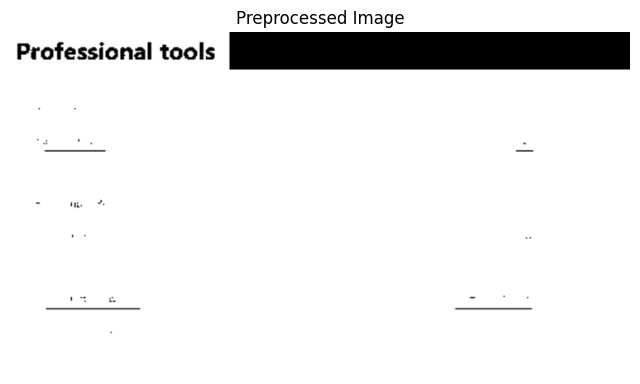


Filtered Terms Based on Category 'wattage':
[]


Extracted Paragraph:
alul:rlt "mht f*aswvde1 ja9n

Words Containing Numeric Characters and Units:
1 ja
9 n


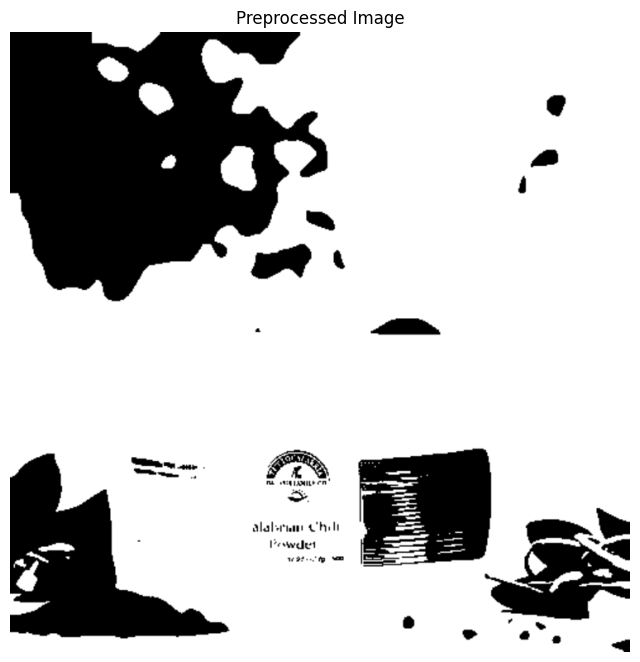


Filtered Terms Based on Category 'item_weight':
[]


Extracted Paragraph:
led osram 554 40 w 470 im bzd

Words Containing Numeric Characters and Units:
40 w
470 im


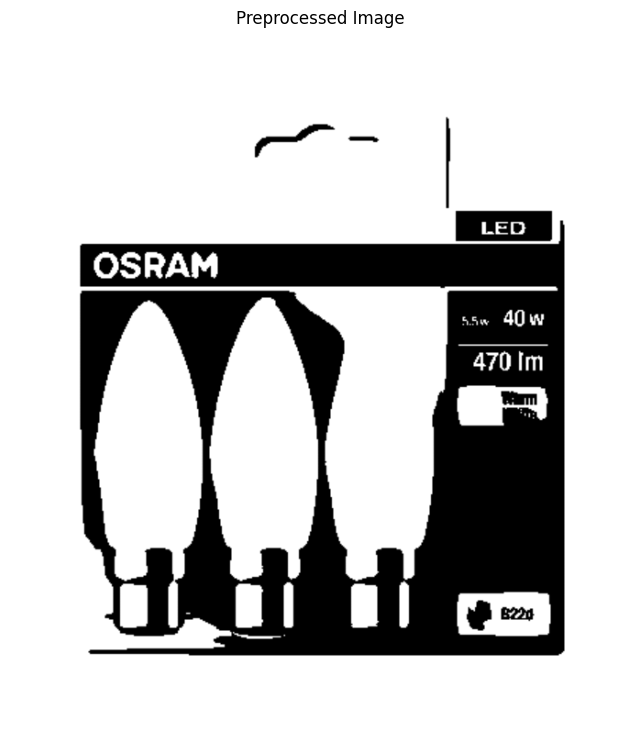


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
led osram 554 40 w 470 im bzd

Words Containing Numeric Characters and Units:
40 w
470 im


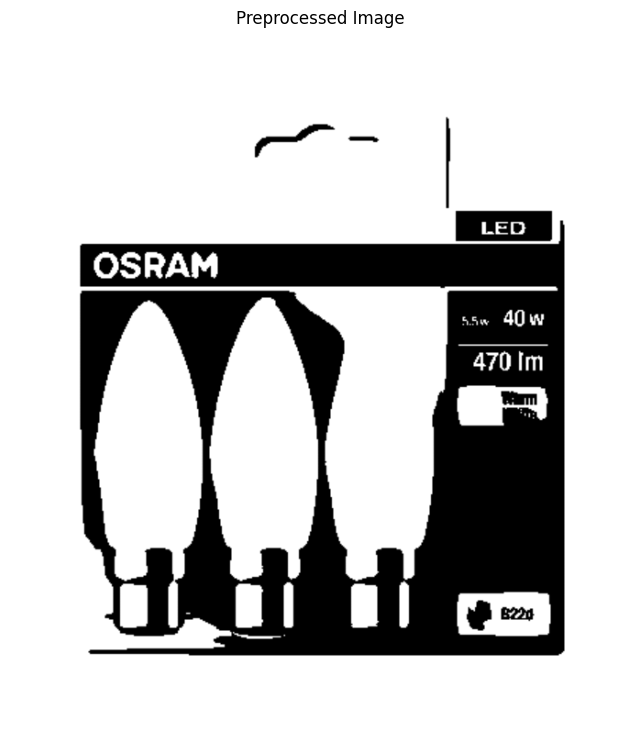


Filtered Terms Based on Category 'wattage':
['40 w']


Extracted Paragraph:
ideal bed & armchair cover neat size foldaway reversible, black on one side & grey on (he othe' 09 sturdy & {ightwcight 2.6 ibs 160 12kg

Words Containing Numeric Characters and Units:
09 sturdy
2.6 ibs
12 kg


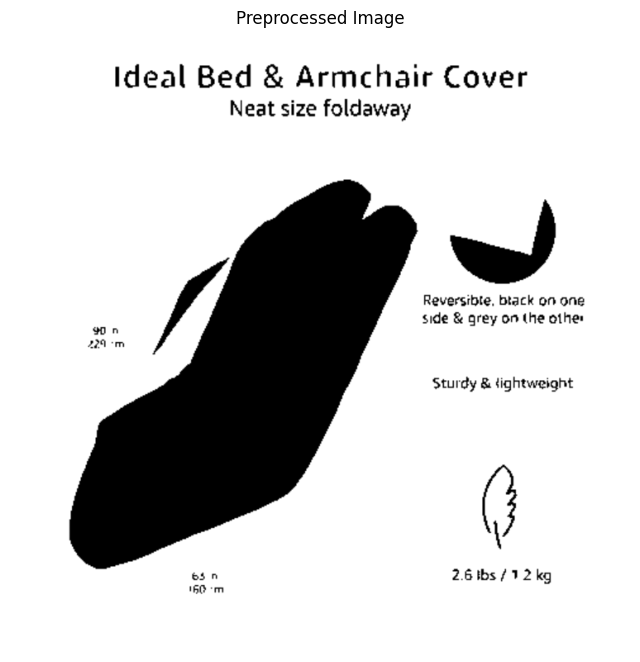


Filtered Terms Based on Category 'height':
[]


Extracted Paragraph:
43d work !ig:i '@i dak aareas dalar

Words Containing Numeric Characters and Units:
43 d


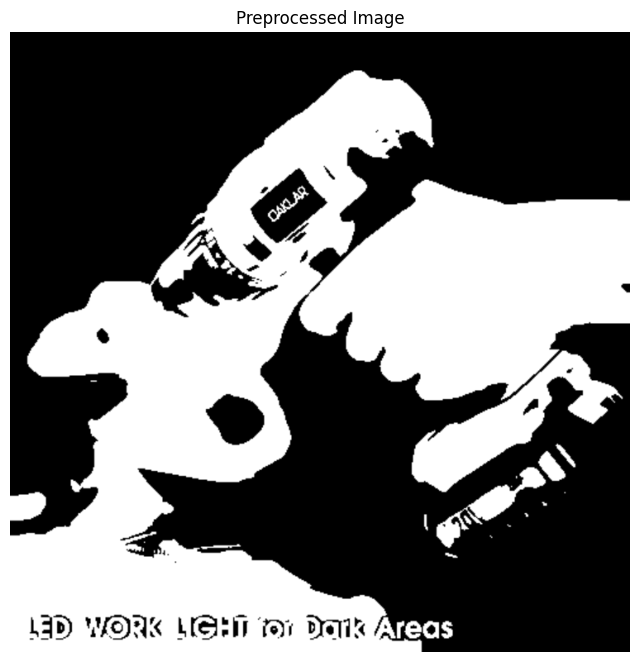


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
4 1 f02"

Words Containing Numeric Characters and Units:
1 f


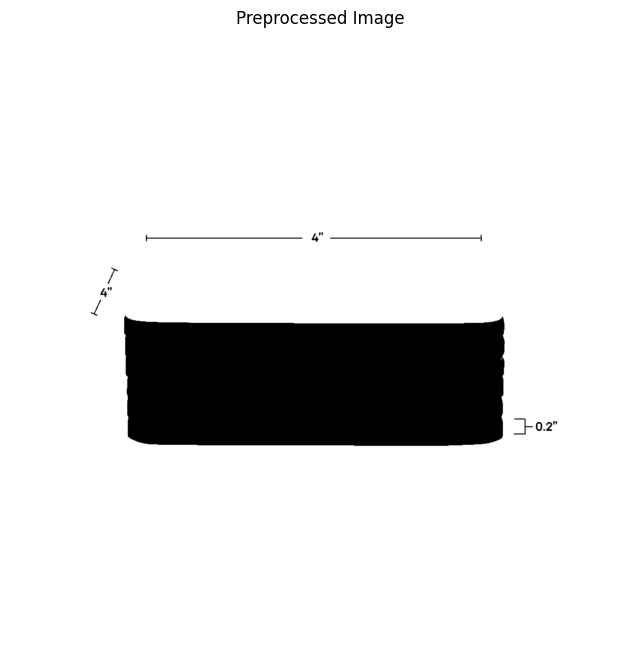


Filtered Terms Based on Category 'depth':
[]


Extracted Paragraph:
4 1 f02"

Words Containing Numeric Characters and Units:
1 f


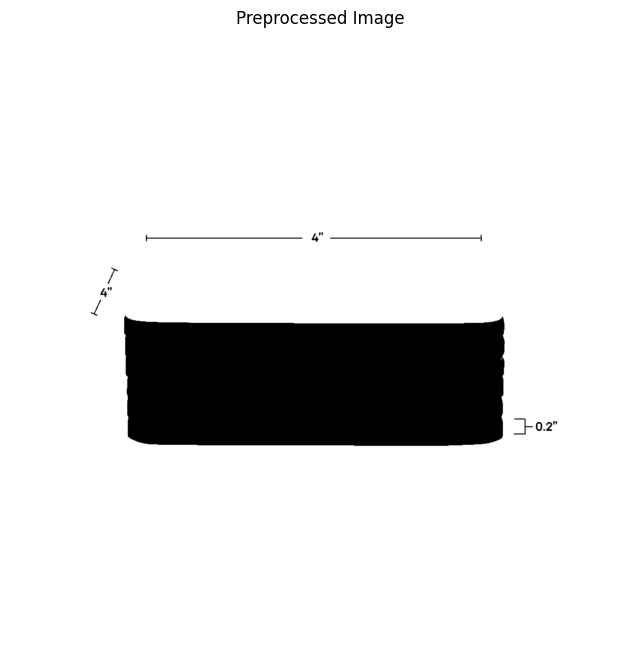


Filtered Terms Based on Category 'width':
[]


Extracted Paragraph:
5ocm 8cm

Words Containing Numeric Characters and Units:
5 ocm
8 cm


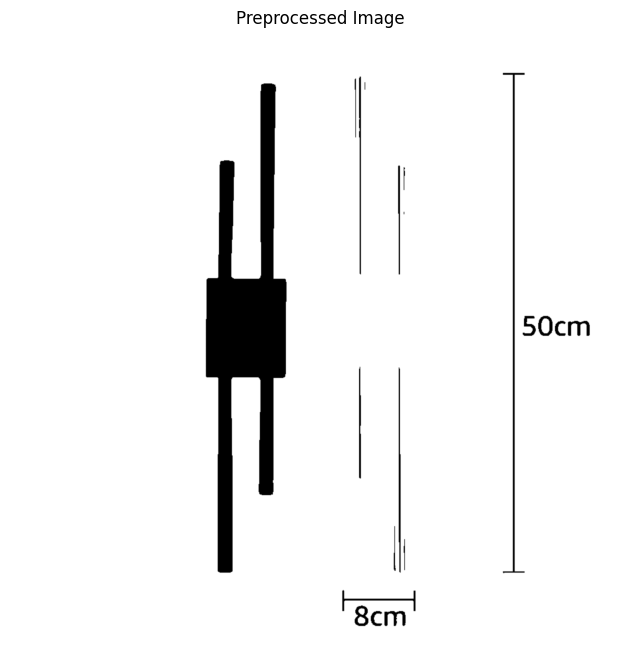


Filtered Terms Based on Category 'depth':
['5 ocm', '8 cm']


Extracted Paragraph:
5ocm 8cm

Words Containing Numeric Characters and Units:
5 ocm
8 cm


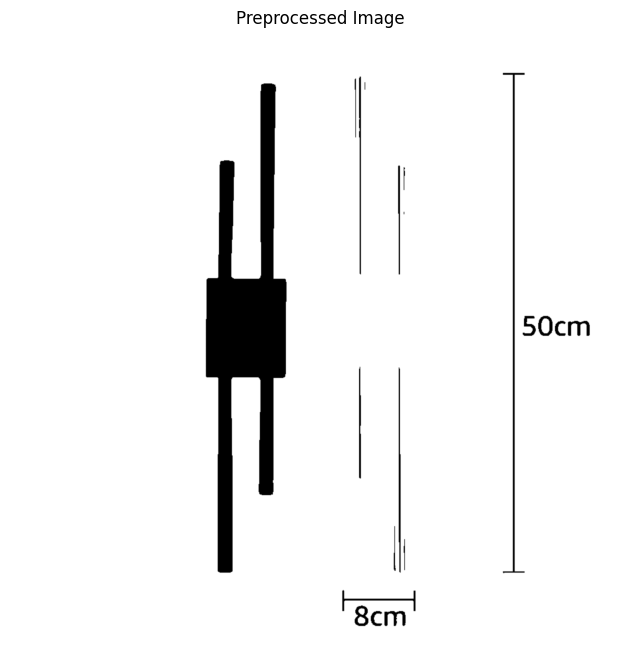


Filtered Terms Based on Category 'height':
['5 ocm', '8 cm']


Extracted Paragraph:
44" 7" 6.75 lbs

Words Containing Numeric Characters and Units:
6.75 lbs


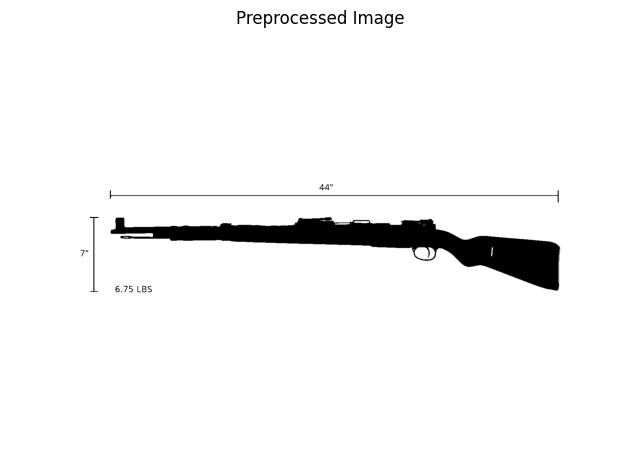


Filtered Terms Based on Category 'item_weight':
['6.75 lbs']


Extracted Paragraph:
desktop size 40" 4 24" 3 8 8 5 9

Words Containing Numeric Characters and Units:


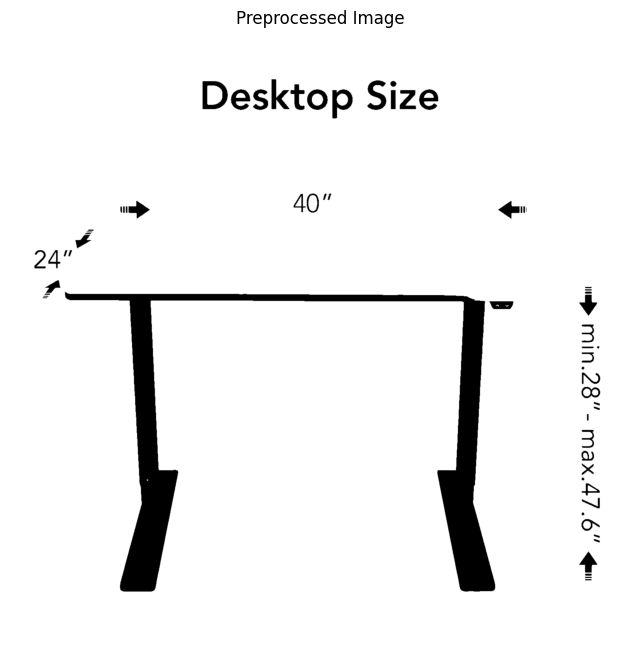


Filtered Terms Based on Category 'depth':
[]


Extracted Paragraph:
desktop size 40" 4 24" 3 8 8 5 9

Words Containing Numeric Characters and Units:


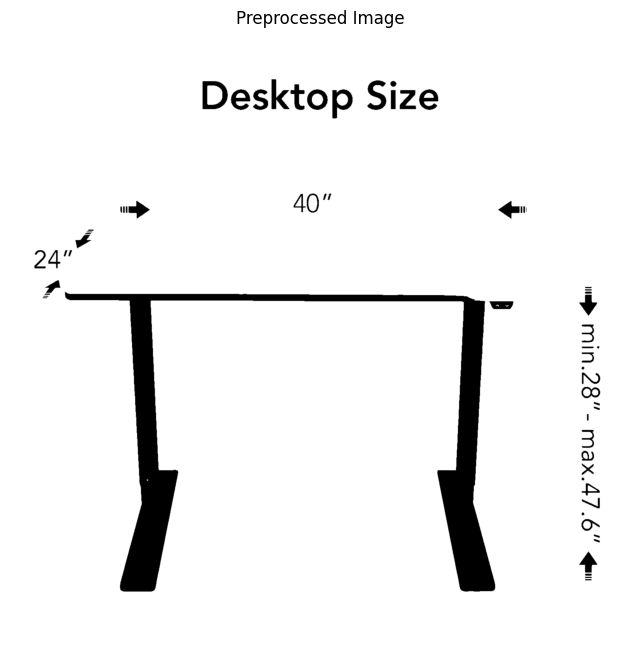


Filtered Terms Based on Category 'width':
[]


Extracted Paragraph:
6.2 in / 16 cm 7 9.4 in / 24 cm

Words Containing Numeric Characters and Units:
6.2 in
16 cm
9.4 in
24 cm


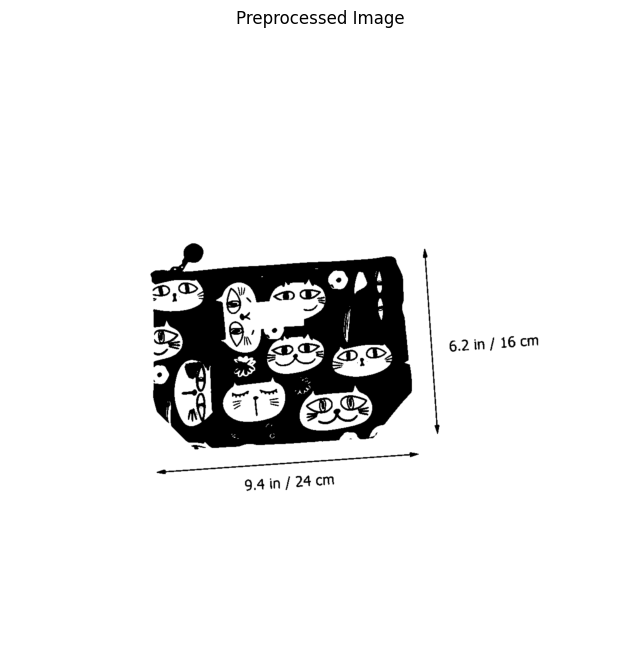


Filtered Terms Based on Category 'depth':
['16 cm', '24 cm']


Extracted Paragraph:
6.2 in / 16 cm 7 9.4 in / 24 cm

Words Containing Numeric Characters and Units:
6.2 in
16 cm
9.4 in
24 cm


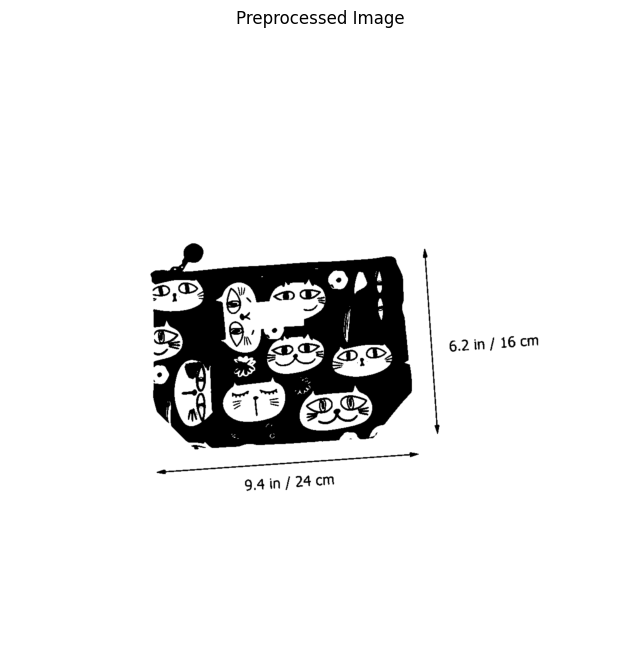


Filtered Terms Based on Category 'height':
['16 cm', '24 cm']


Extracted Paragraph:
width 1cm. length 9 meter

Words Containing Numeric Characters and Units:
1 cm
9 meter


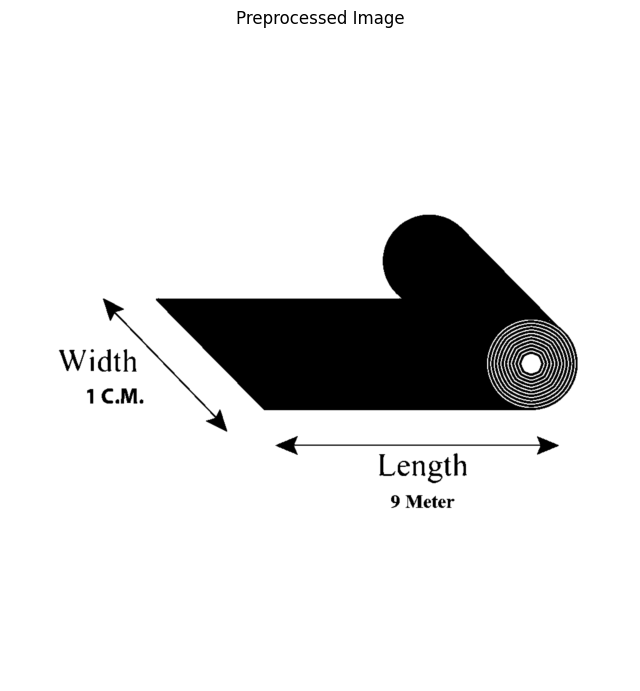


Filtered Terms Based on Category 'depth':
['1 cm']


Extracted Paragraph:
width 1cm. length 9 meter

Words Containing Numeric Characters and Units:
1 cm
9 meter


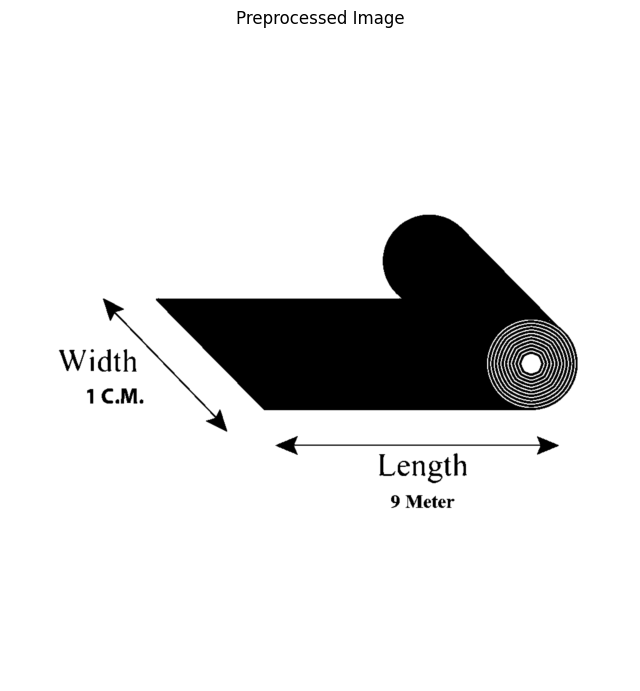


Filtered Terms Based on Category 'height':
['1 cm']


Extracted Paragraph:
width 1cm. length 9 meter

Words Containing Numeric Characters and Units:
1 cm
9 meter


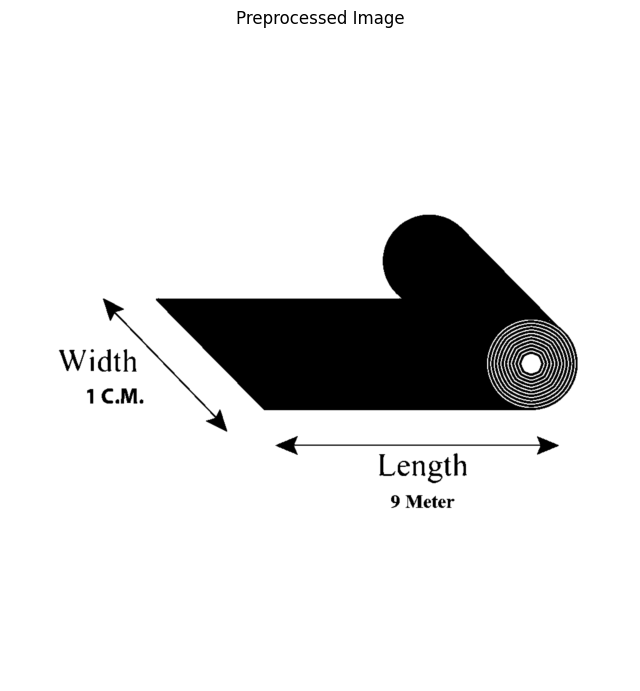


Filtered Terms Based on Category 'depth':
['1 cm']


Extracted Paragraph:
3 1

Words Containing Numeric Characters and Units:


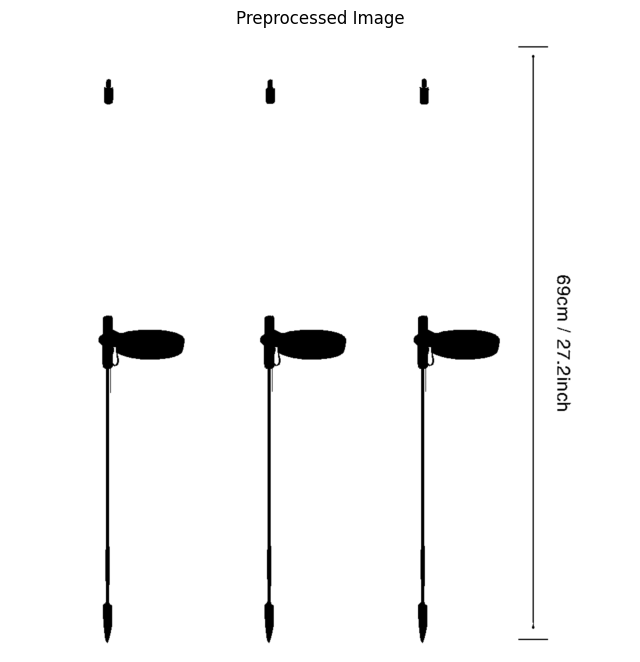


Filtered Terms Based on Category 'width':
[]


Extracted Paragraph:
3 1

Words Containing Numeric Characters and Units:


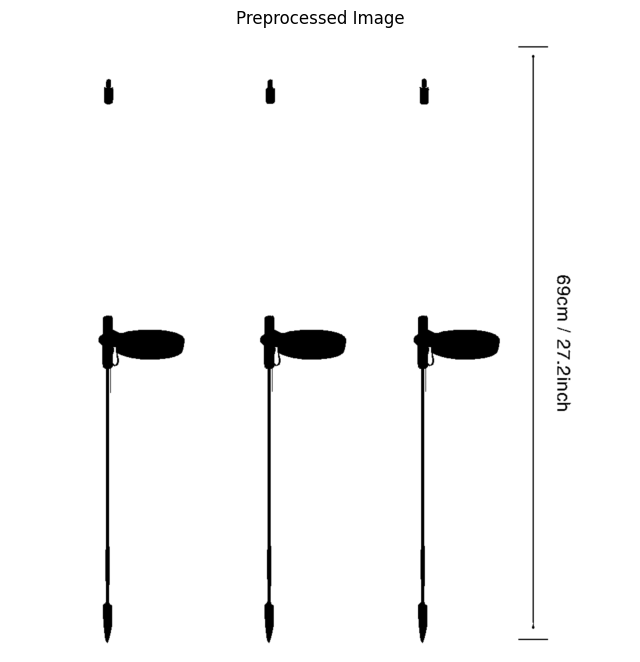


Filtered Terms Based on Category 'depth':
[]


Extracted Paragraph:
powered by dc 12v cidaneree gilter hiuy powel source; built-in fuse eftecively prevent electrical overload: universal for 12v power soutce cars

Words Containing Numeric Characters and Units:
12 v
12 v


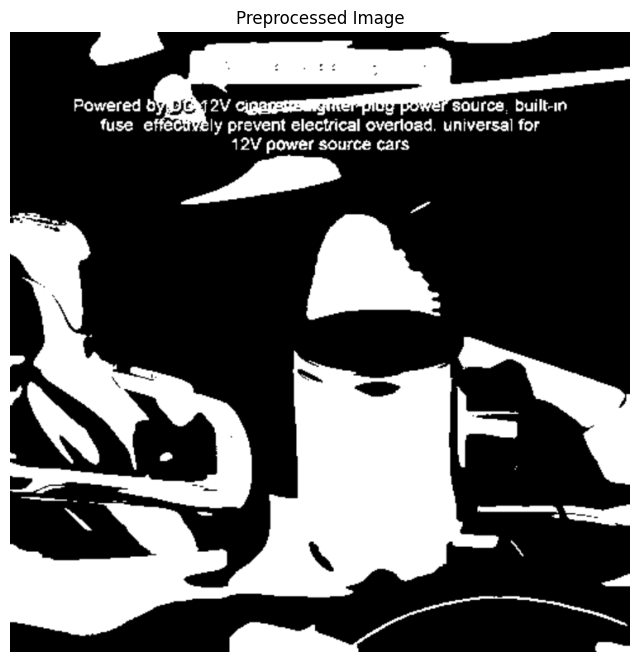


Filtered Terms Based on Category 'voltage':
['12 v', '12 v']


Extracted Paragraph:
powered by dc 12v cidaneree gilter hiuy powel source; built-in fuse eftecively prevent electrical overload: universal for 12v power soutce cars

Words Containing Numeric Characters and Units:
12 v
12 v


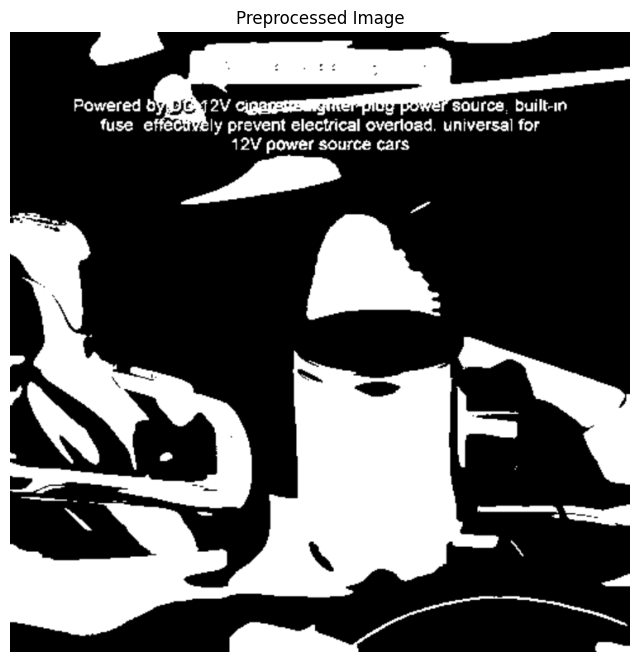


Filtered Terms Based on Category 'wattage':
[]


Extracted Paragraph:
70 xkt 110_ cm cm

Words Containing Numeric Characters and Units:
70 xkt


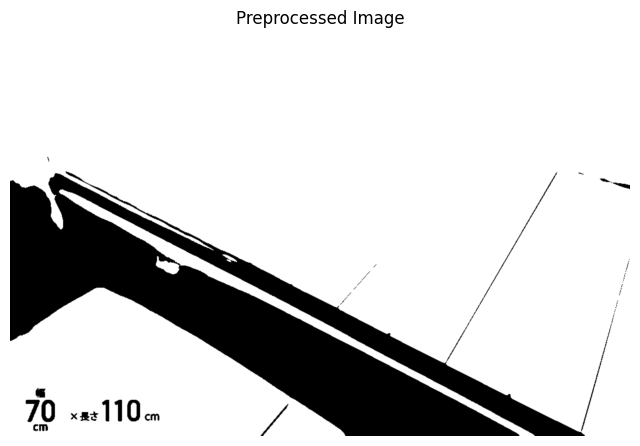


Filtered Terms Based on Category 'width':
[]


Extracted Paragraph:
70 xkt 110_ cm cm

Words Containing Numeric Characters and Units:
70 xkt


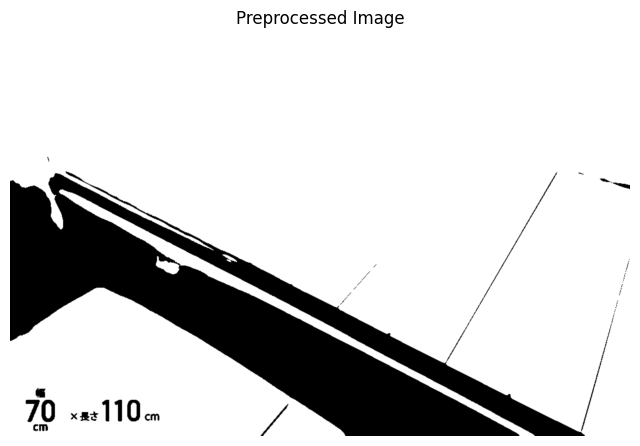


Filtered Terms Based on Category 'height':
[]


Extracted Paragraph:
7 .8inch l

Words Containing Numeric Characters and Units:
.8 inch


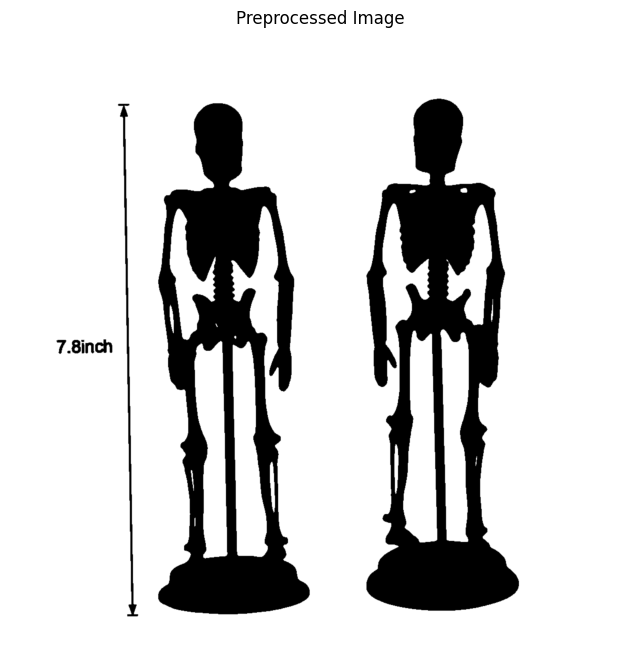


Filtered Terms Based on Category 'width':
['.8 inch']


Extracted Paragraph:
7 .8inch l

Words Containing Numeric Characters and Units:
.8 inch


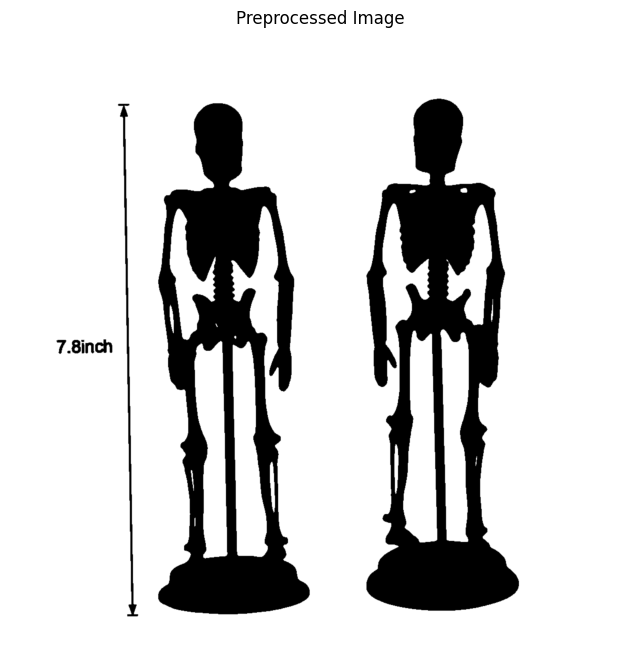


Filtered Terms Based on Category 'depth':
['.8 inch']


Extracted Paragraph:
7 .8inch l

Words Containing Numeric Characters and Units:
.8 inch


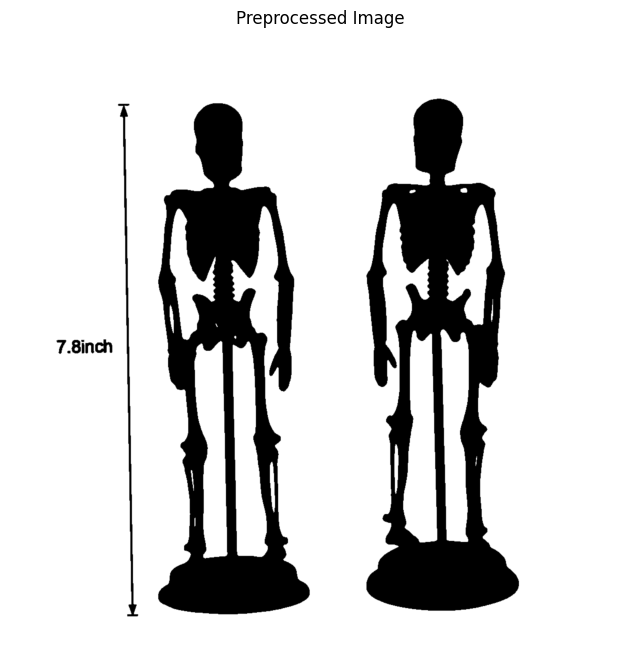


Filtered Terms Based on Category 'height':
['.8 inch']


Extracted Paragraph:
30 cm 15 cm

Words Containing Numeric Characters and Units:
30 cm
15 cm


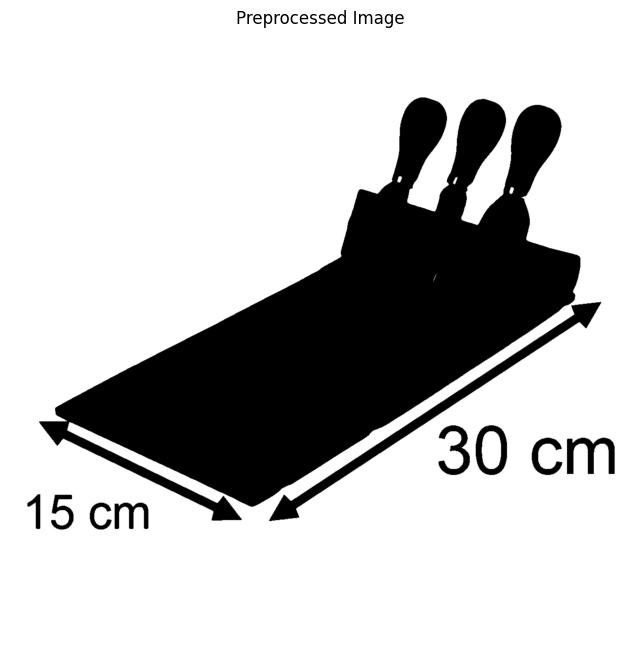


Filtered Terms Based on Category 'height':
['30 cm', '15 cm']


Extracted Paragraph:
7 8 73cm/28.7in 5cr1. 9zin

Words Containing Numeric Characters and Units:
73 cm
28.7 in
5 cr
9 zin


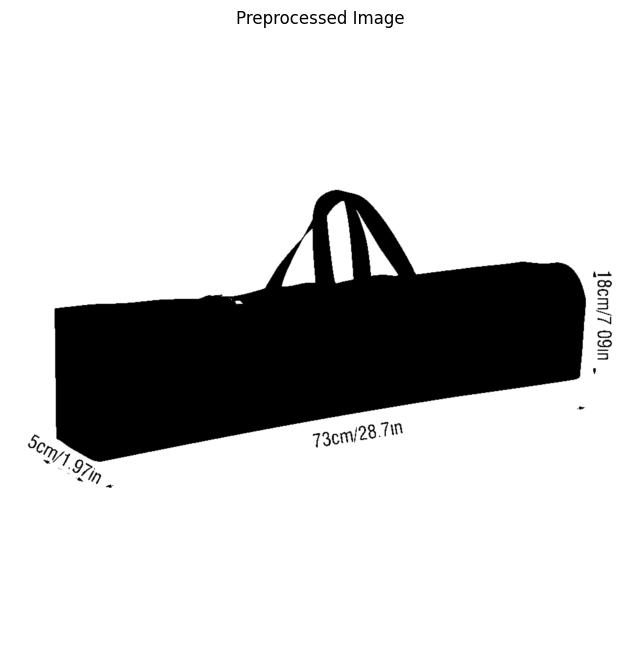


Filtered Terms Based on Category 'width':
['73 cm']


Extracted Paragraph:
7 8 73cm/28.7in 5cr1. 9zin

Words Containing Numeric Characters and Units:
73 cm
28.7 in
5 cr
9 zin


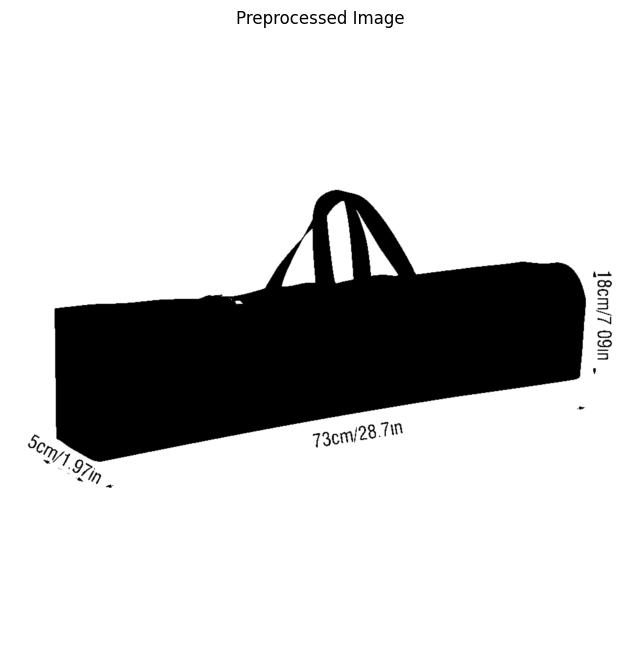


Filtered Terms Based on Category 'depth':
['73 cm']


Extracted Paragraph:
our faux-leather & textured velvet fabrics are durable as they are soft cushion covers are removable and machine washable easy to spot clean all other surlaces foam cushion for comfort and sueport toggle and bop secures cushion from sliding for large dogs up to tn: 442) mcto pet  75 ibs maxwell sofa

Words Containing Numeric Characters and Units:
75 ibs


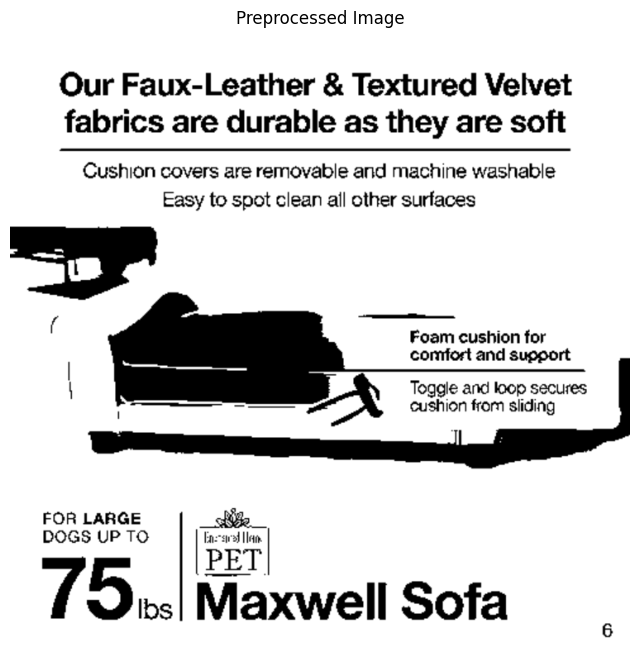


Filtered Terms Based on Category 'maximum_weight_recommendation':
[]


Extracted Paragraph:
rubber hangers 50 thin )

Words Containing Numeric Characters and Units:
50 thin


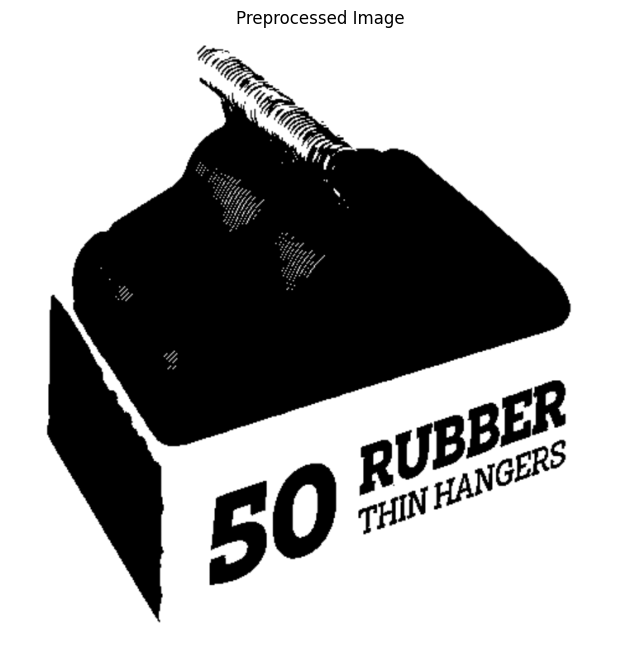


Filtered Terms Based on Category 'maximum_weight_recommendation':
[]


Extracted Paragraph:
e{i1.1 ,4cm i13.8cm kikis s( delivery-service i4- kdgmh n sc 4ot 1j320ml

Words Containing Numeric Characters and Units:
4 cm
13.8 cm
4 ot
1 j
320 ml


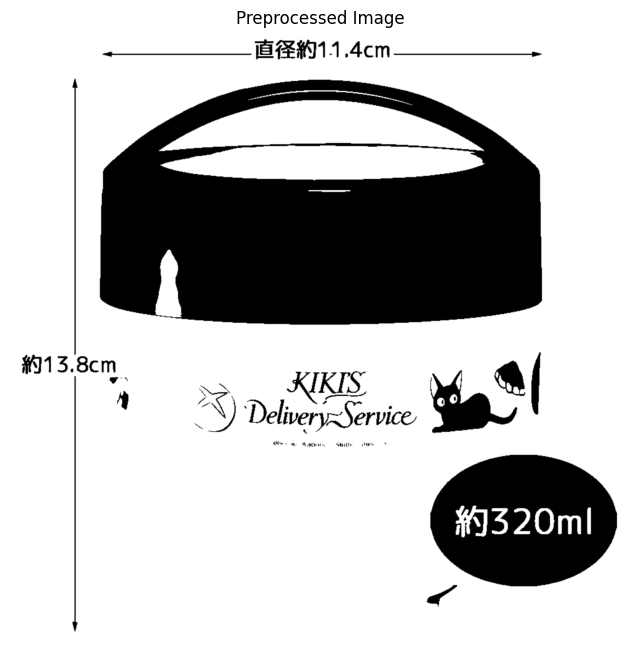


Filtered Terms Based on Category 'depth':
['4 cm', '13.8 cm']


Extracted Paragraph:
stvzze 12inches /30.scm 4.2inches 6inches 9.sinches/24.1cm /10.7cm

Words Containing Numeric Characters and Units:
12 inches
4.2 inches
6 inches
24.1 cm
10.7 cm


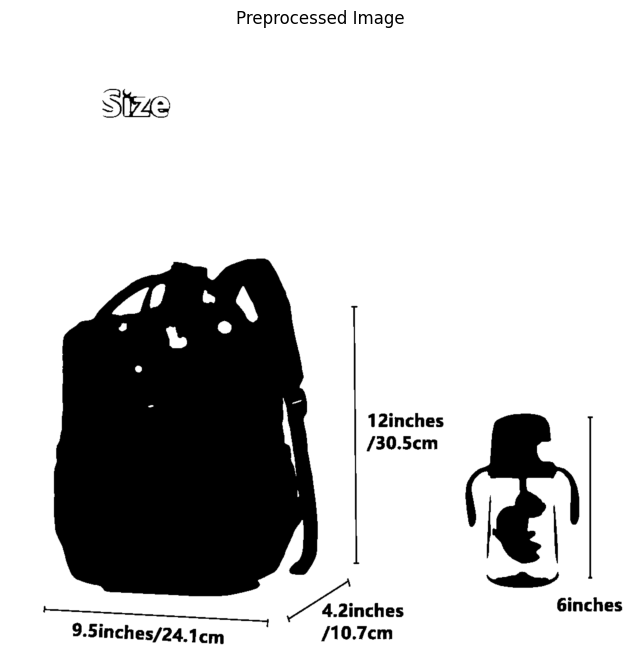


Filtered Terms Based on Category 'width':
['12 inches', '4.2 inches', '6 inches', '24.1 cm', '10.7 cm']


Extracted Paragraph:
16 cm example size samsung s9+ 6.5 cm 8.5cm 7.5cm

Words Containing Numeric Characters and Units:
16 cm
6.5 cm
8.5 cm
7.5 cm


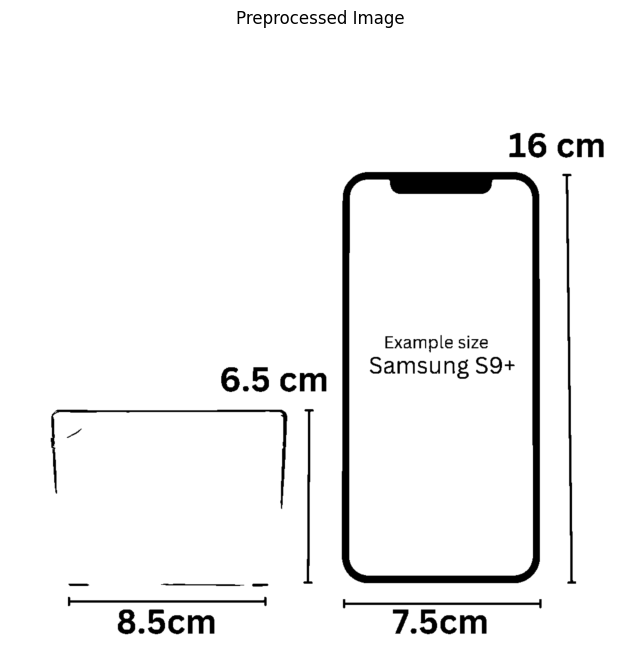


Filtered Terms Based on Category 'depth':
['16 cm', '6.5 cm', '8.5 cm', '7.5 cm']


Extracted Paragraph:
e26 medium base 1 4.2 inches

Words Containing Numeric Characters and Units:
26 medium
4.2 inches


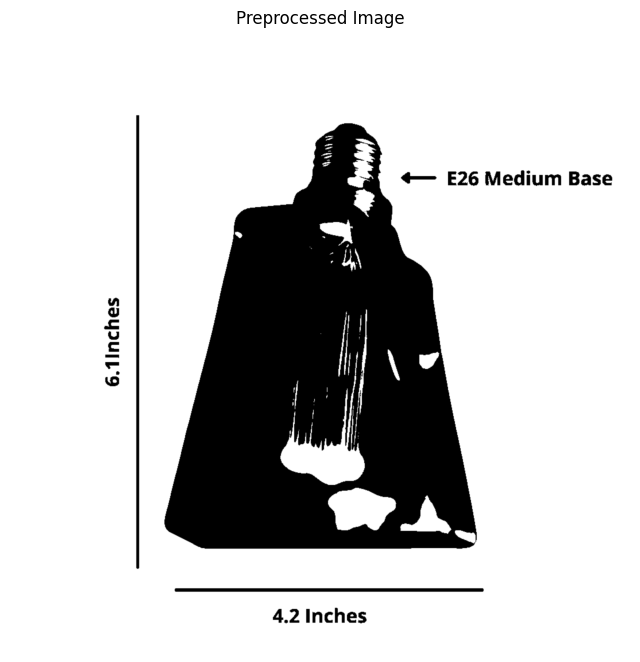


Filtered Terms Based on Category 'width':
['4.2 inches']


Extracted Paragraph:
e26 medium base 1 4.2 inches

Words Containing Numeric Characters and Units:
26 medium
4.2 inches


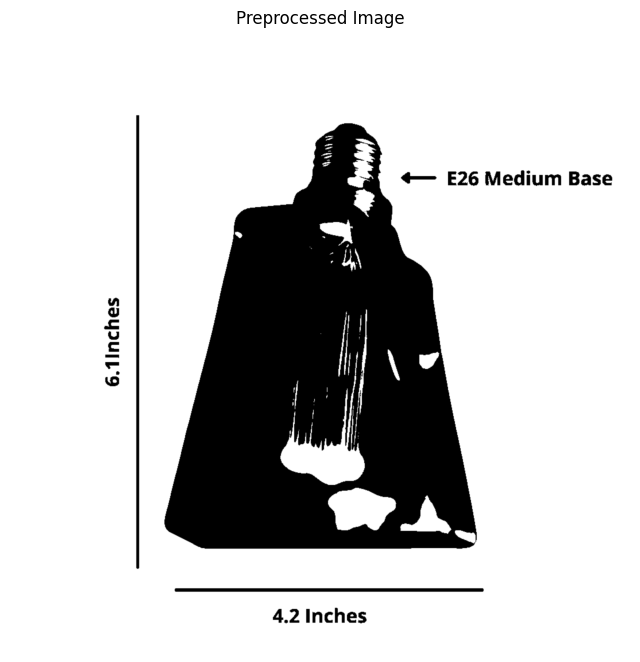


Filtered Terms Based on Category 'depth':
['4.2 inches']


Extracted Paragraph:
e26 medium base 1 4.2 inches

Words Containing Numeric Characters and Units:
26 medium
4.2 inches


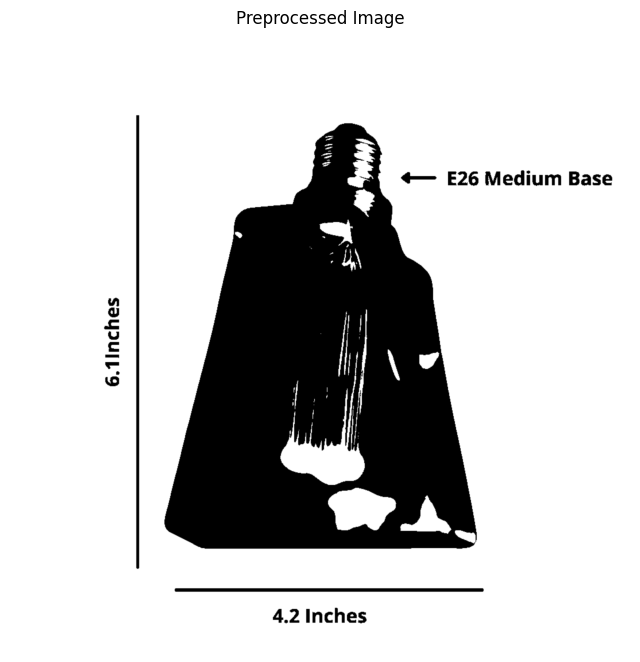


Filtered Terms Based on Category 'height':
['4.2 inches']


Extracted Paragraph:
grows with accommodates children ages 3-6 your child t 444 max adjustable hcighi lock ttt

Words Containing Numeric Characters and Units:
6 your
444 max


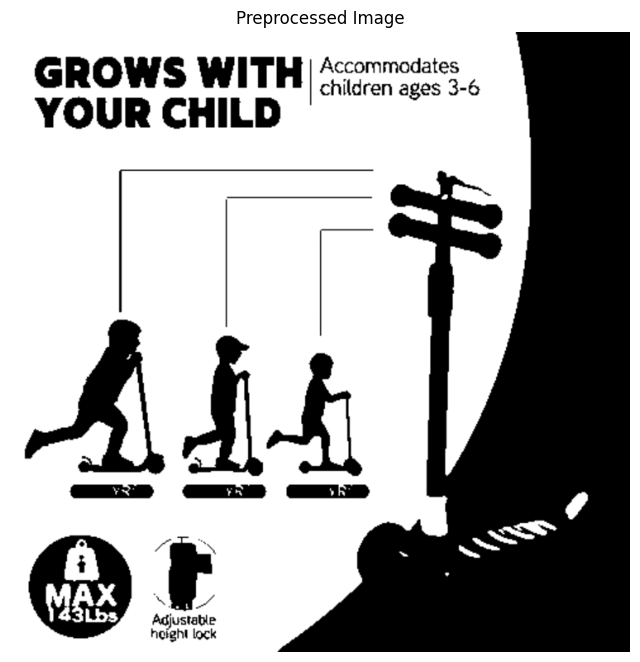


Filtered Terms Based on Category 'maximum_weight_recommendation':
[]


Extracted Paragraph:
3

Words Containing Numeric Characters and Units:


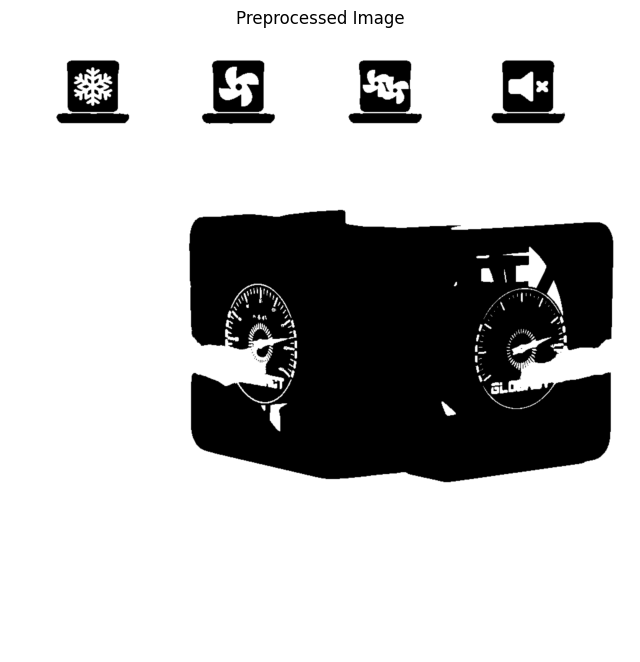


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
3

Words Containing Numeric Characters and Units:


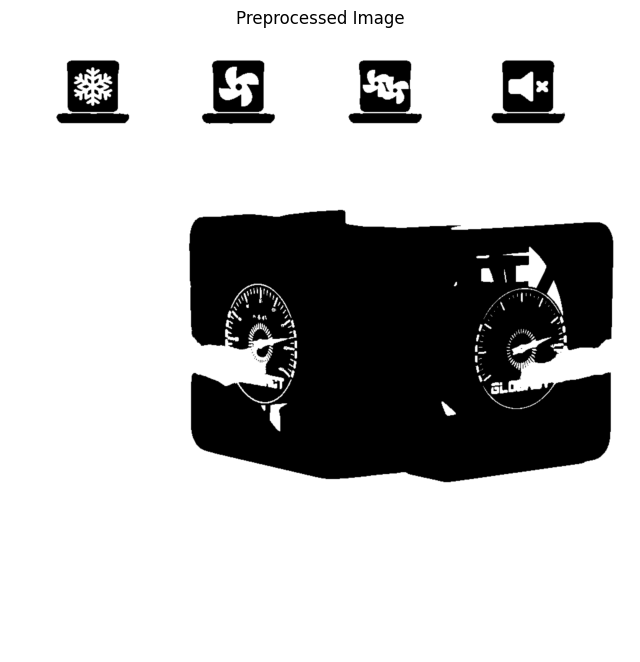


Filtered Terms Based on Category 'wattage':
[]


Extracted Paragraph:
> 3  3 1

Words Containing Numeric Characters and Units:


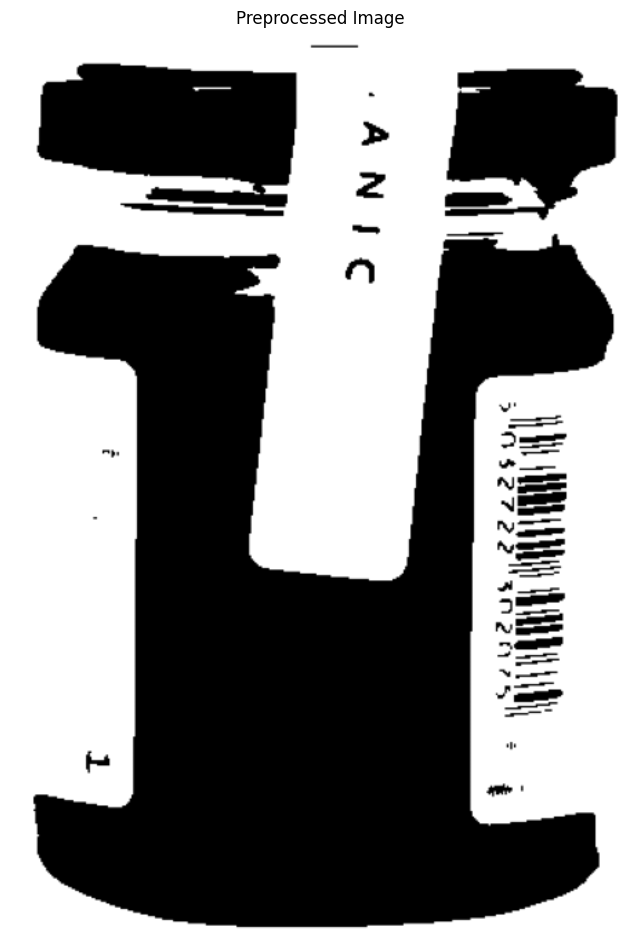


Filtered Terms Based on Category 'item_weight':
[]


Extracted Paragraph:
1 55.6mm

Words Containing Numeric Characters and Units:
55.6 mm


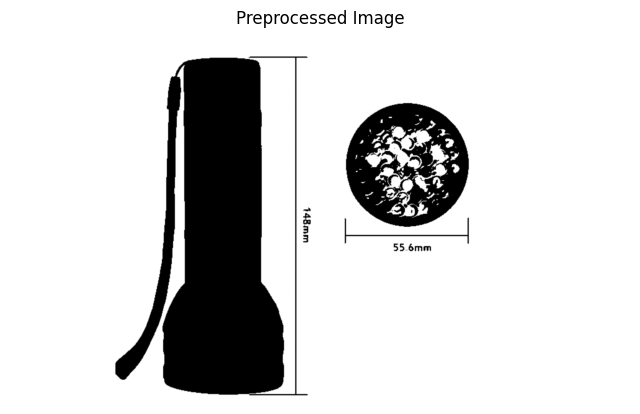


Filtered Terms Based on Category 'width':
[]


Extracted Paragraph:
1 55.6mm

Words Containing Numeric Characters and Units:
55.6 mm


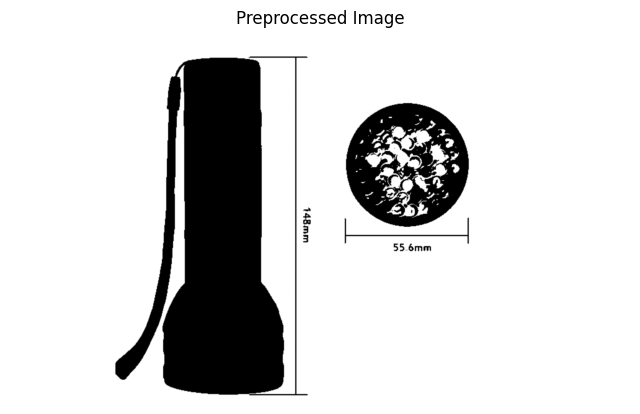


Filtered Terms Based on Category 'depth':
[]


Extracted Paragraph:
energy information at high speed airflow electricity use airflow efficiency 4,400 45 98 cublc feet watts cubic feet per per minute (excludes lights) minute per watt compare 36" to 48" celling fans have airflow efficiencies ranging from approximately 71 to 86 cubic feet per minute per watt at high speed money-savlng tp: talri ult 'dli ~lie" led"iru rucur

Words Containing Numeric Characters and Units:
98 cublc
71 to
86 cubic


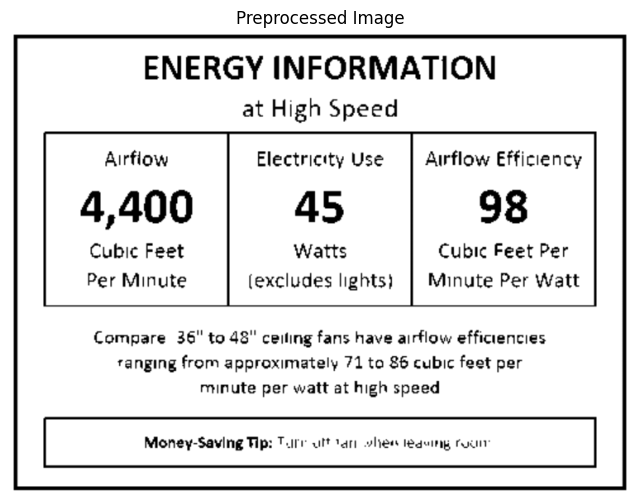


Filtered Terms Based on Category 'item_weight':
[]


Extracted Paragraph:
energy information at high speed airflow electricity use airflow efficiency 4,400 45 98 cublc feet watts cubic feet per per minute (excludes lights) minute per watt compare 36" to 48" celling fans have airflow efficiencies ranging from approximately 71 to 86 cubic feet per minute per watt at high speed money-savlng tp: talri ult 'dli ~lie" led"iru rucur

Words Containing Numeric Characters and Units:
98 cublc
71 to
86 cubic


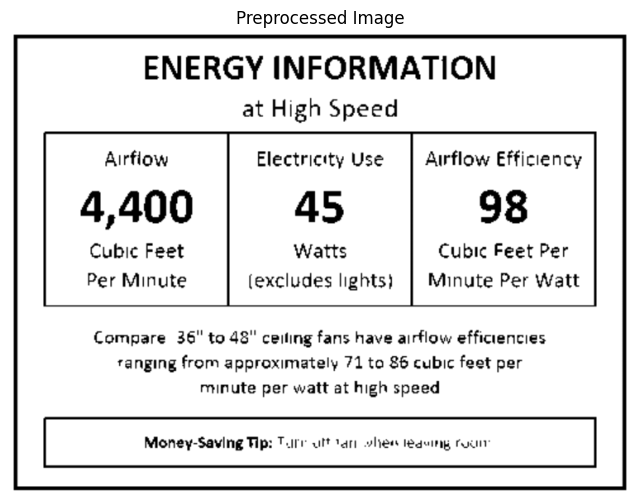


Filtered Terms Based on Category 'wattage':
[]


Extracted Paragraph:
energy information at high speed airflow electricity use airflow efficiency 4,400 45 98 cublc feet watts cubic feet per per minute (excludes lights) minute per watt compare 36" to 48" celling fans have airflow efficiencies ranging from approximately 71 to 86 cubic feet per minute per watt at high speed money-savlng tp: talri ult 'dli ~lie" led"iru rucur

Words Containing Numeric Characters and Units:
98 cublc
71 to
86 cubic


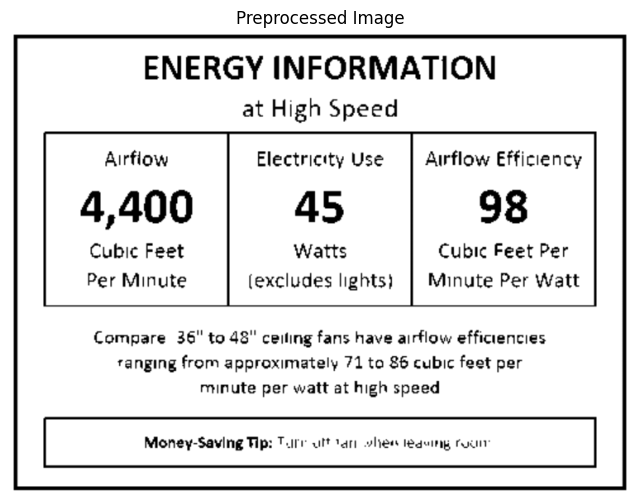


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
olom il ` m itn   u,ly ist press; power on; znd press; led light off, peace and qulet; operating as quletly as 30db; 3rd press, shut off detail display large air inlet design; 1z00ml big capacity high effiction sterilization abs material bpa material filter design free

Words Containing Numeric Characters and Units:
30 db
3 rd
1 z
00 ml


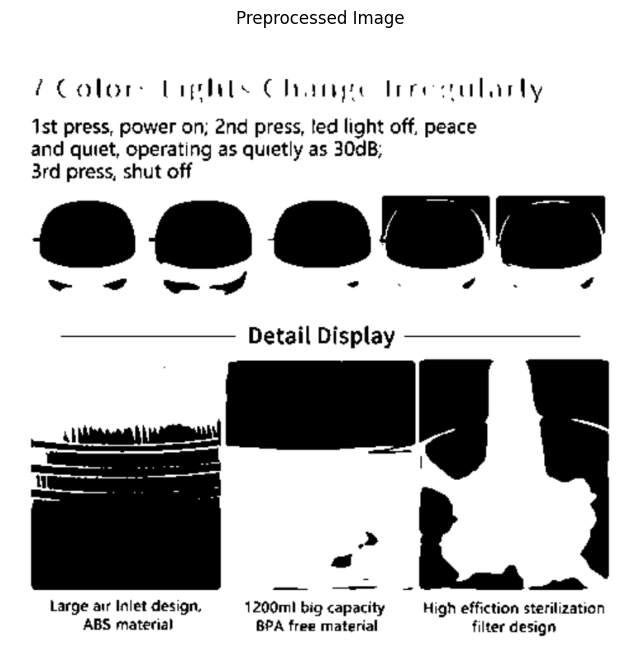


Filtered Terms Based on Category 'wattage':
[]


Extracted Paragraph:
svicco 25 cm 35 cm 32 cm 100 cn 32 cm 23 cm 50 cm 90 cm

Words Containing Numeric Characters and Units:
25 cm
35 cm
32 cm
100 cn
32 cm
23 cm
50 cm
90 cm


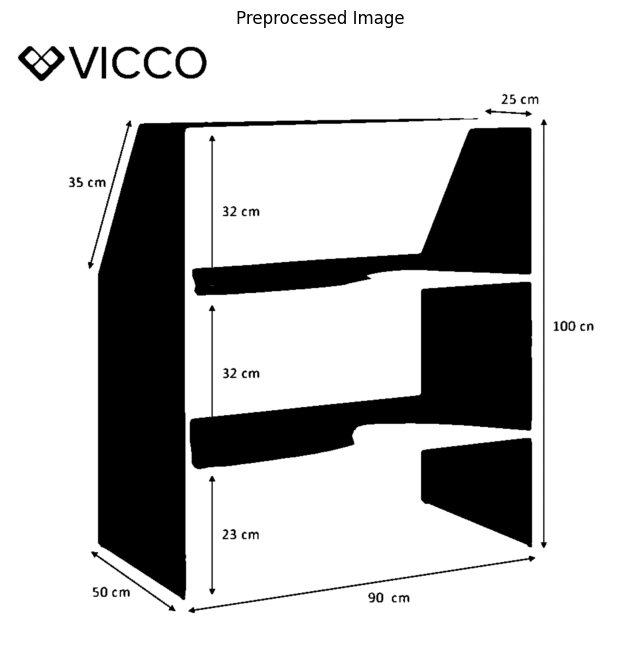


Filtered Terms Based on Category 'width':
['25 cm', '35 cm', '32 cm', '32 cm', '23 cm', '50 cm', '90 cm']


Extracted Paragraph:
13.4"

Words Containing Numeric Characters and Units:


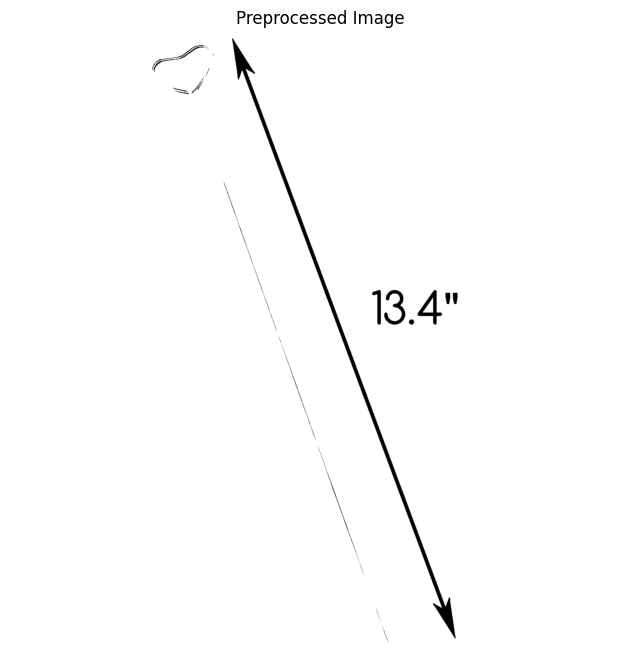


Filtered Terms Based on Category 'width':
[]


Extracted Paragraph:
13.4"

Words Containing Numeric Characters and Units:


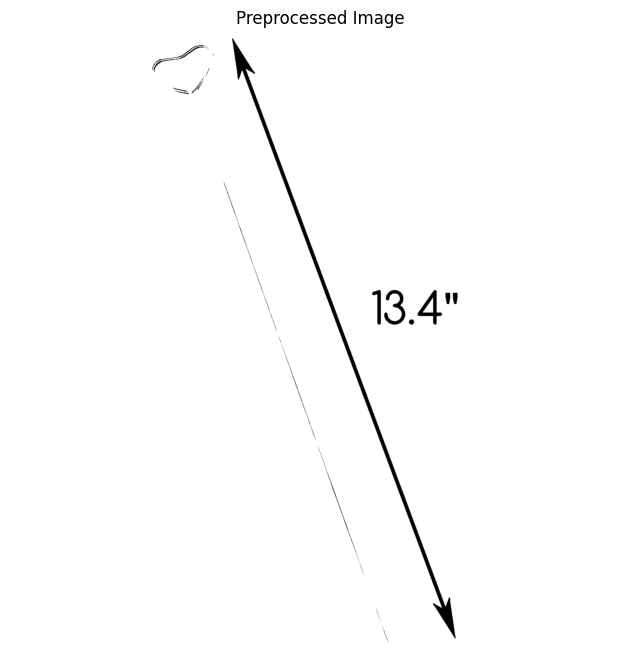


Filtered Terms Based on Category 'depth':
[]


Extracted Paragraph:
13.4"

Words Containing Numeric Characters and Units:


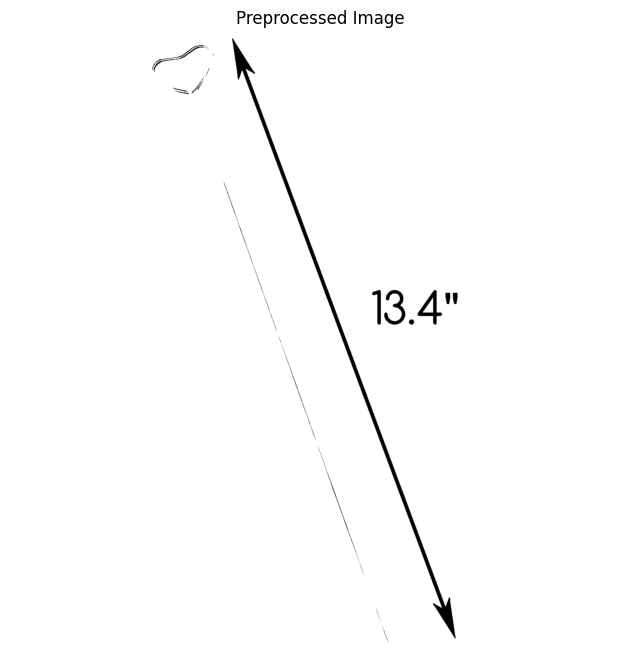


Filtered Terms Based on Category 'height':
[]


Extracted Paragraph:
model name commercial ice maker machine capacity 0.6 cubic feet wattage 280.0 watts voltage 120.0 volts of alternating current

Words Containing Numeric Characters and Units:
0.6 cubic
280.0 watts
120.0 volts


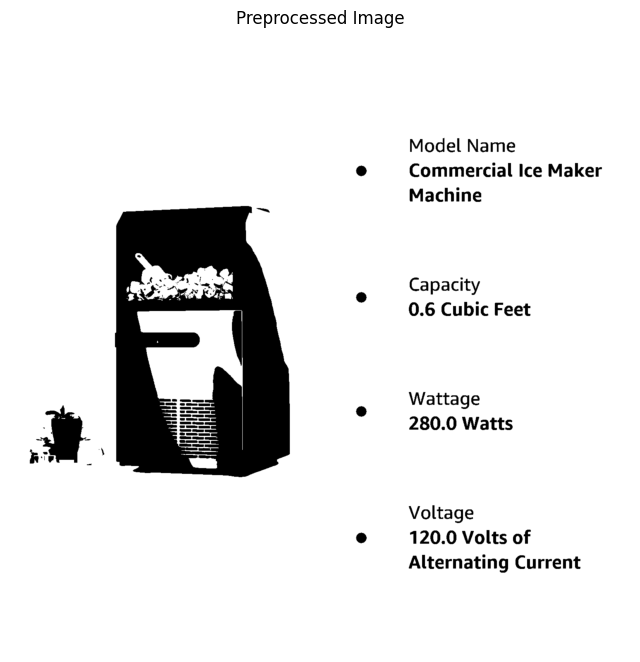


Filtered Terms Based on Category 'voltage':
['120.0 volts']


Extracted Paragraph:
model name commercial ice maker machine capacity 0.6 cubic feet wattage 280.0 watts voltage 120.0 volts of alternating current

Words Containing Numeric Characters and Units:
0.6 cubic
280.0 watts
120.0 volts


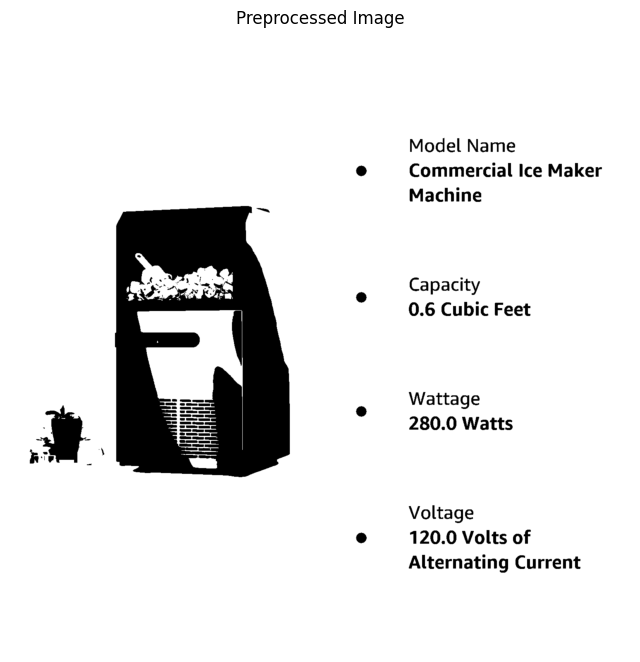


Filtered Terms Based on Category 'wattage':
['280.0 watts']


Extracted Paragraph:
extra 10ft long cord

Words Containing Numeric Characters and Units:
10 ft


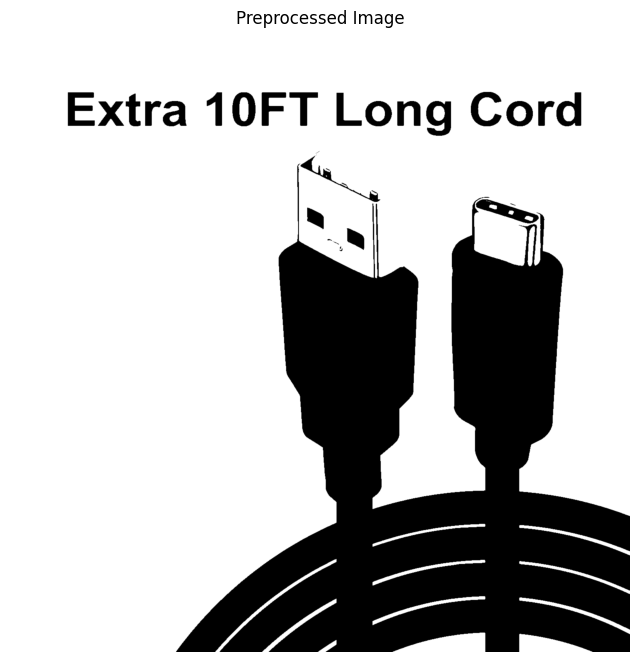


Filtered Terms Based on Category 'wattage':
[]


Extracted Paragraph:
7" / 18cm 4.3"/11cm 1.4" '/3.5cm

Words Containing Numeric Characters and Units:
18 cm
11 cm
3.5 cm


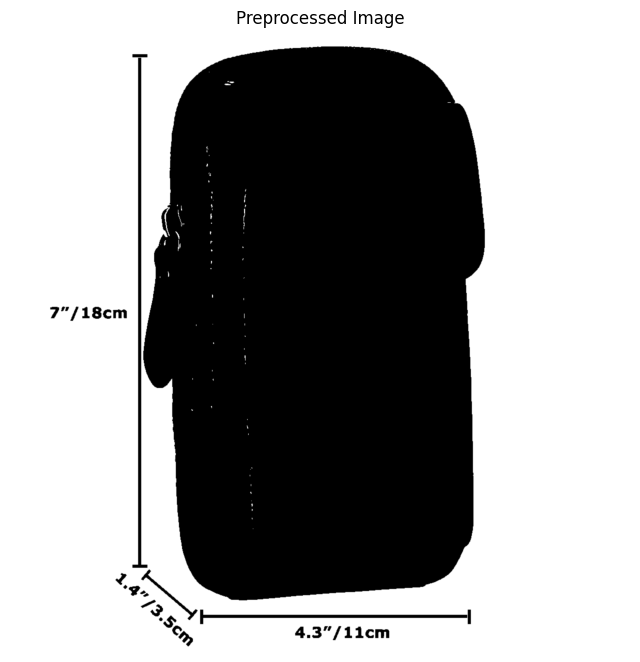


Filtered Terms Based on Category 'depth':
['18 cm', '11 cm', '3.5 cm']


Extracted Paragraph:
7" / 18cm 4.3"/11cm 1.4" '/3.5cm

Words Containing Numeric Characters and Units:
18 cm
11 cm
3.5 cm


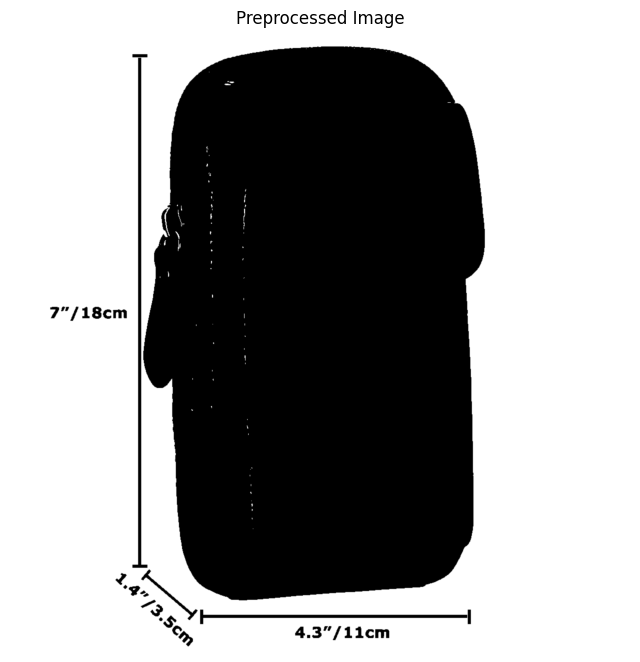


Filtered Terms Based on Category 'height':
['18 cm', '11 cm', '3.5 cm']


Extracted Paragraph:
the product is made of pe material strong flexibility . long use   time 10*3omm after putting in the protective object, it also plays the role of shock absorption tojavoid sliding

Words Containing Numeric Characters and Units:
3 omm


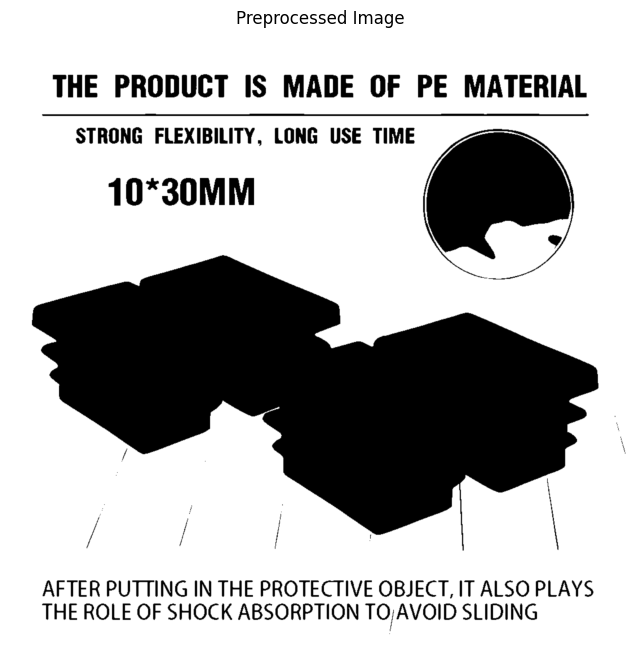


Filtered Terms Based on Category 'height':
[]


Extracted Paragraph:
5ocm 51cm a  0   m € i 8ocm 61cm < perfect size

Words Containing Numeric Characters and Units:
5 ocm
51 cm
0 m
8 ocm
61 cm


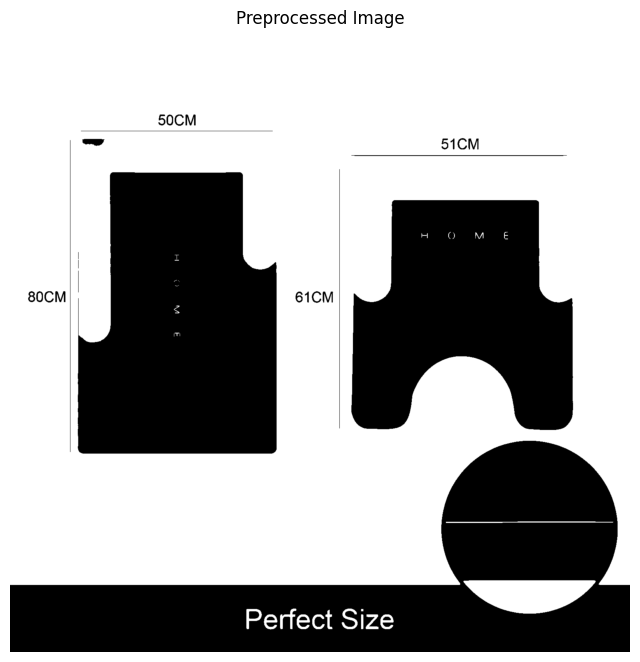


Filtered Terms Based on Category 'width':
['5 ocm', '51 cm', '8 ocm', '61 cm']


Extracted Paragraph:
in the box 25mm 134mm handle * 1 68.3mm specifications d 4153 compatibility cage, plate, etc mount for arri-style product dimensions 134,0 * 68.3 x 27.8mm package dimensions 155.0 *81.5 x 42.omm product weight 156.0 * 5g package weight 192.2 * sg materialls) aluminum alloy

Words Containing Numeric Characters and Units:
25 mm
134 mm
68.3 mm
4153 compatibility
68.3 x
27.8 mm
81.5 x
5 g


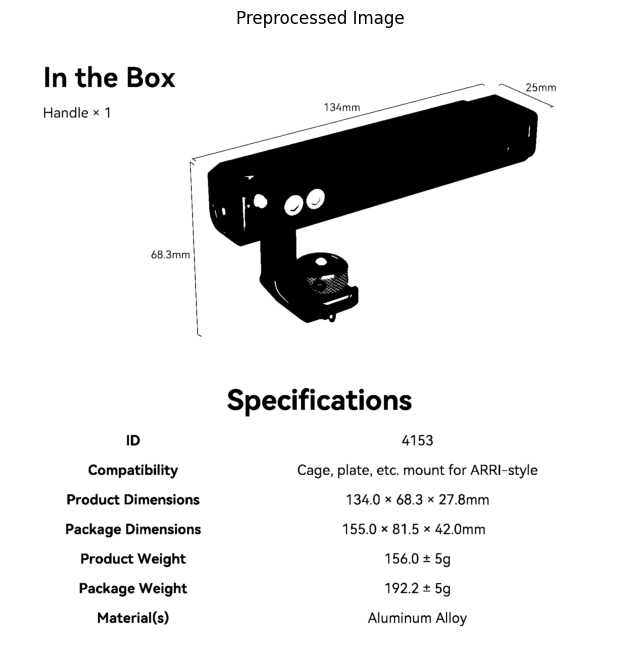


Filtered Terms Based on Category 'item_weight':
['5 g']


Extracted Paragraph:
in the box 25mm 134mm handle * 1 68.3mm specifications d 4153 compatibility cage, plate, etc mount for arri-style product dimensions 134,0 * 68.3 x 27.8mm package dimensions 155.0 *81.5 x 42.omm product weight 156.0 * 5g package weight 192.2 * sg materialls) aluminum alloy

Words Containing Numeric Characters and Units:
25 mm
134 mm
68.3 mm
4153 compatibility
68.3 x
27.8 mm
81.5 x
5 g


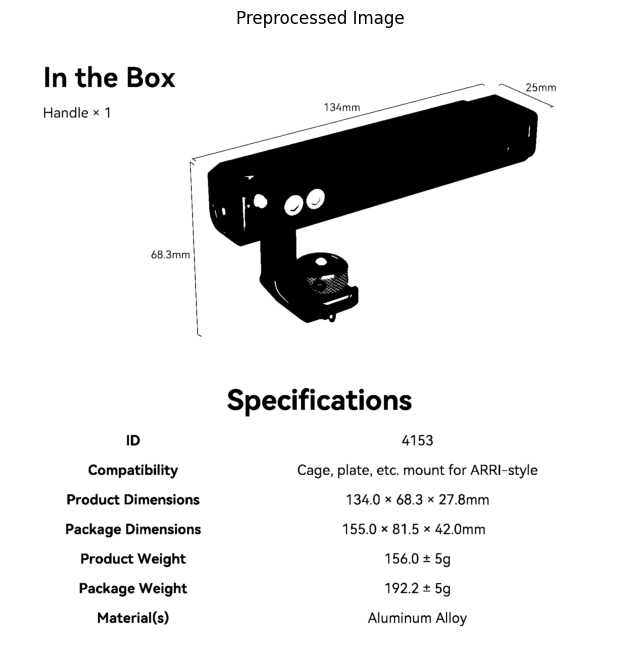


Filtered Terms Based on Category 'maximum_weight_recommendation':
['5 g']


Extracted Paragraph:
maw m1r 2 <0s desert tan small but mighty all-in-one rechargeable keychain light 150 lumens

Words Containing Numeric Characters and Units:
1 r
0 s
150 lumens


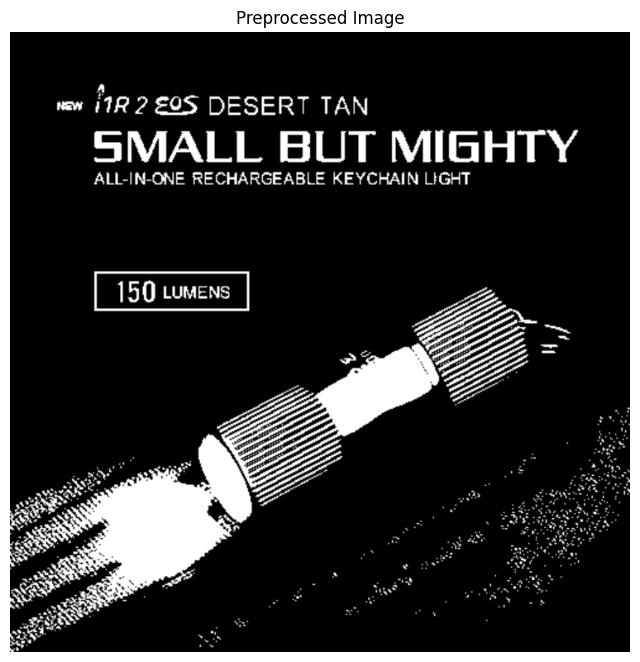


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
4a current more stable for charging it takes about 90 minutes to fully charge three bat- teries at once output: dc 17.6v, 12a (each channel 17.6v , 4a)

Words Containing Numeric Characters and Units:
4 a
90 minutes
17.6 v
12 a
17.6 v
4 a


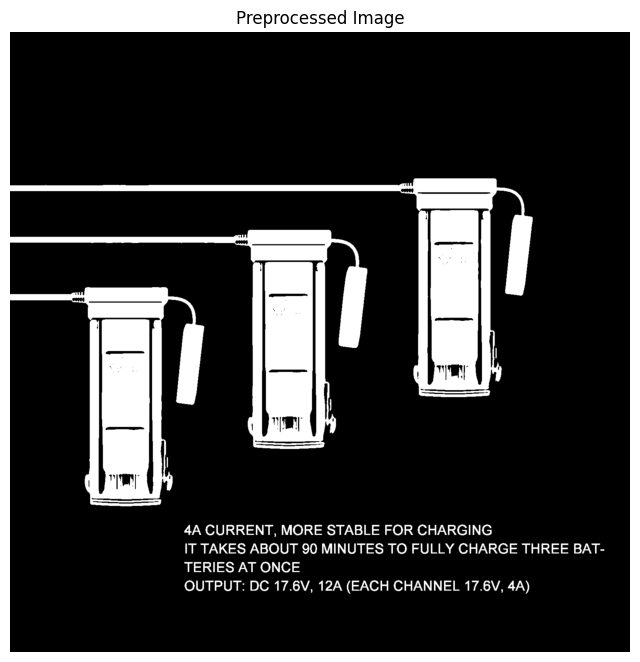


Filtered Terms Based on Category 'item_weight':
[]


Extracted Paragraph:
80 plus certificate 80 pluse long connector 333 cables 12cm fan 500 watts

Words Containing Numeric Characters and Units:
80 plus
80 pluse
333 cables
12 cm
500 watts


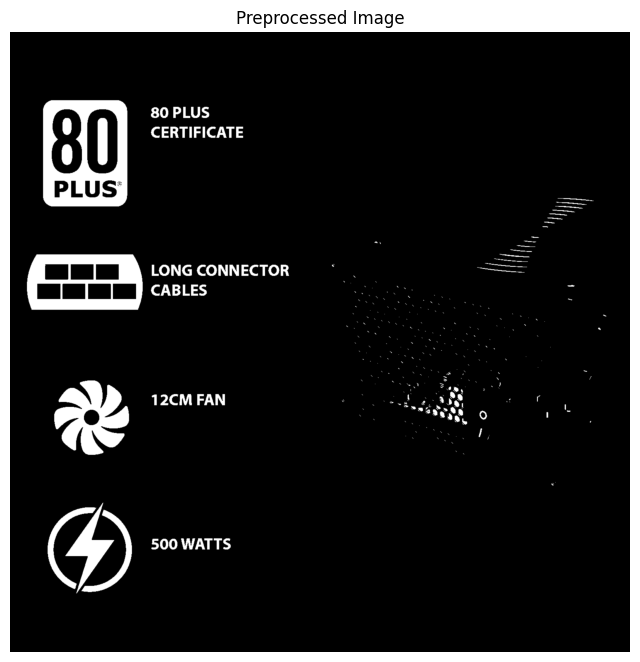


Filtered Terms Based on Category 'wattage':
['500 watts']


Extracted Paragraph:
80 plus certificate 80 pluse long connector 333 cables 12cm fan 500 watts

Words Containing Numeric Characters and Units:
80 plus
80 pluse
333 cables
12 cm
500 watts


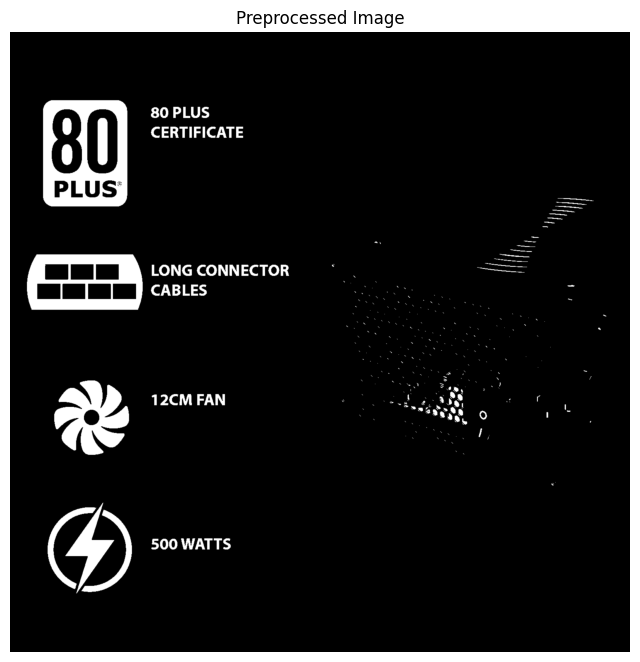


Filtered Terms Based on Category 'item_weight':
[]


Extracted Paragraph:
commercial grade steel excellent weight capacity 67

Words Containing Numeric Characters and Units:


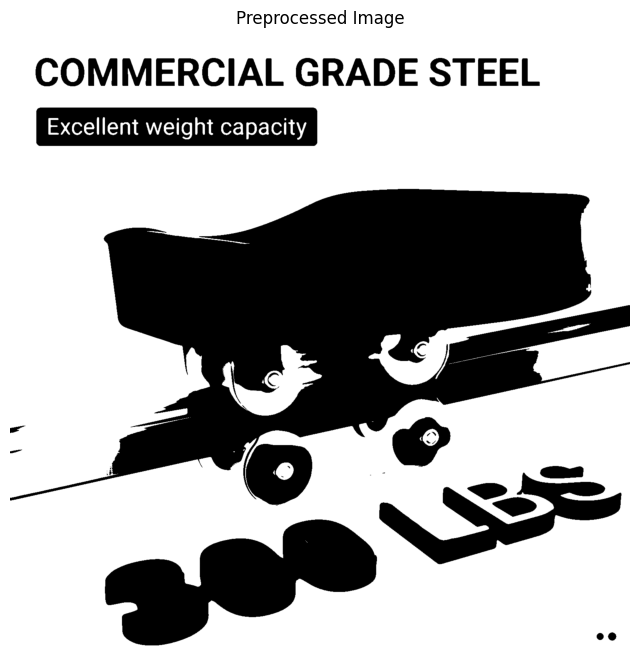


Filtered Terms Based on Category 'item_weight':
[]


Extracted Paragraph:
commercial grade steel excellent weight capacity 67

Words Containing Numeric Characters and Units:


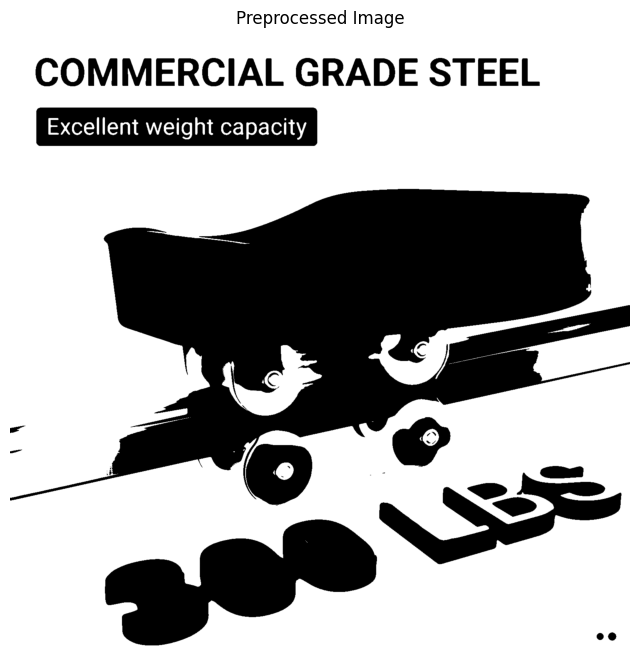


Filtered Terms Based on Category 'maximum_weight_recommendation':
[]


Extracted Paragraph:
4olb large capacity ( 8 mins fast ice making new design and premium quality freezimer

Words Containing Numeric Characters and Units:
4 olb
8 mins


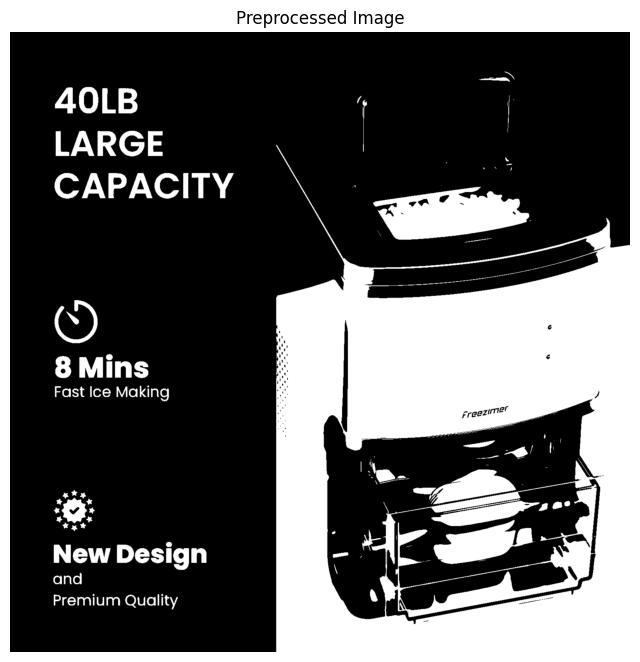


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
4olb large capacity ( 8 mins fast ice making new design and premium quality freezimer

Words Containing Numeric Characters and Units:
4 olb
8 mins


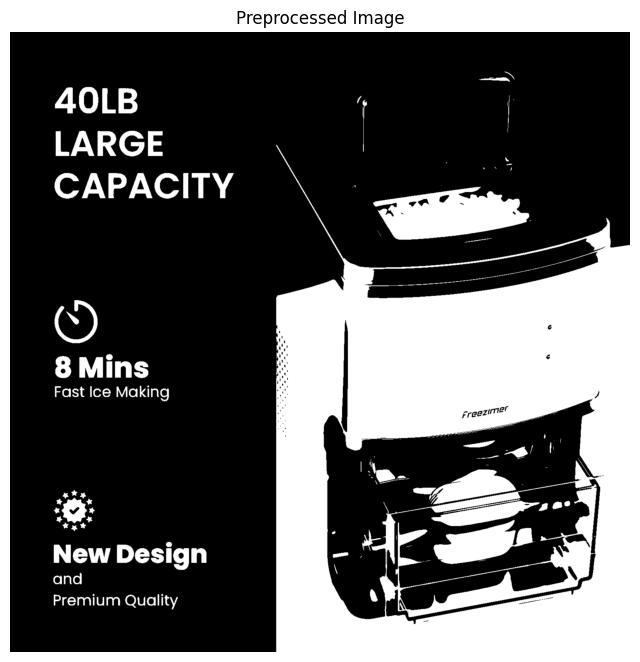


Filtered Terms Based on Category 'wattage':
[]


Extracted Paragraph:
ice haker tib: color 2 stainless steel product dimensions: 11.7*14.4*14.8 in ice store capacity : 2.2 ibs capacity of making ice ' 33 ibs/day power rate: 110w water tank capacity 3.2l sect daf aux

Words Containing Numeric Characters and Units:
2 stainless
14.8 in
2.2 ibs
33 ibs
110 w
3.2 l


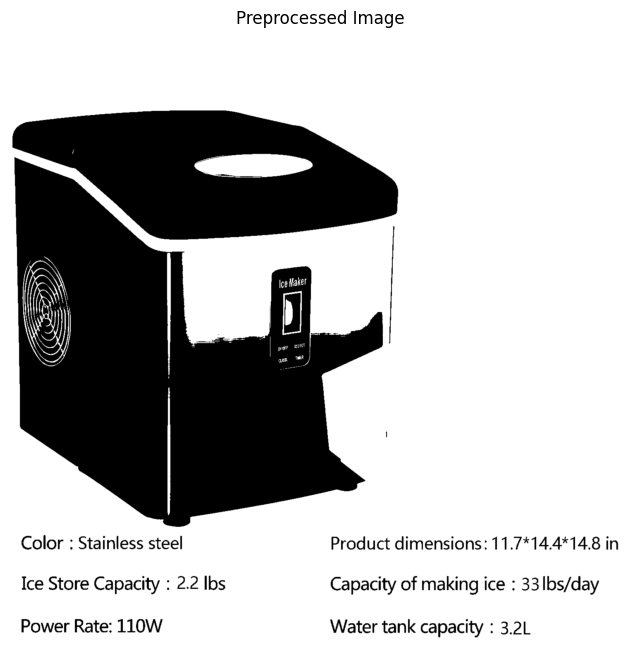


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
ice haker tib: color 2 stainless steel product dimensions: 11.7*14.4*14.8 in ice store capacity : 2.2 ibs capacity of making ice ' 33 ibs/day power rate: 110w water tank capacity 3.2l sect daf aux

Words Containing Numeric Characters and Units:
2 stainless
14.8 in
2.2 ibs
33 ibs
110 w
3.2 l


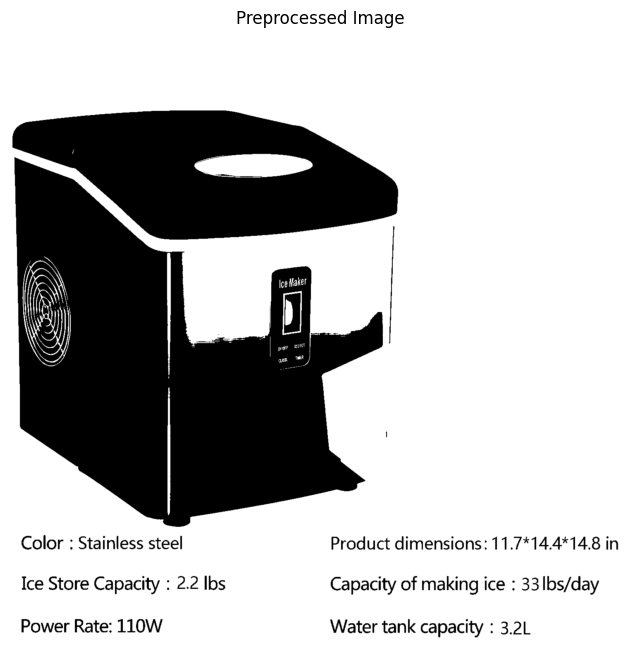


Filtered Terms Based on Category 'wattage':
['110 w']


Extracted Paragraph:
photo accessories deluxe ball head 10 t-0007 specifications: heavy-duty melal construction designed for a wide range 0/ ohoto enthusiasts single-action large handle for fast ad precise positior ng exceptionally smooth rotalion an0 posilive locking nandle incorporates 1/4 tripod screw weight 1 ilbs color black

Words Containing Numeric Characters and Units:
10 t
0007 specifications
0 posilive
4 tripod
1 ilbs


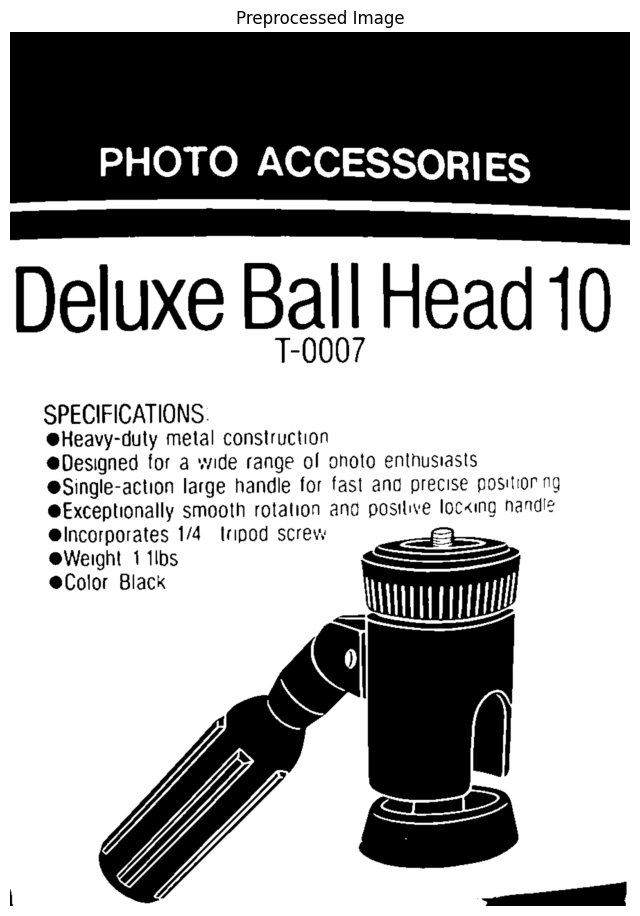


Filtered Terms Based on Category 'maximum_weight_recommendation':
['1 ilbs']


Extracted Paragraph:
photo accessories deluxe ball head 10 t-0007 specifications: heavy-duty melal construction designed for a wide range 0/ ohoto enthusiasts single-action large handle for fast ad precise positior ng exceptionally smooth rotalion an0 posilive locking nandle incorporates 1/4 tripod screw weight 1 ilbs color black

Words Containing Numeric Characters and Units:
10 t
0007 specifications
0 posilive
4 tripod
1 ilbs


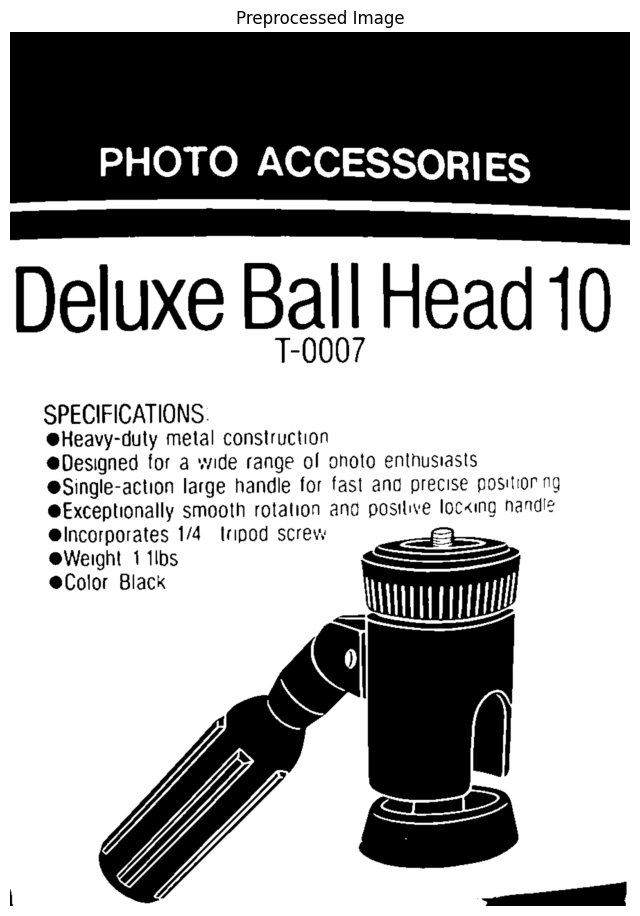


Filtered Terms Based on Category 'item_weight':
['1 ilbs']


Extracted Paragraph:
shen re exerclsing not into the more comfortatl' ughtwelght deslgn transfer speed the sound is synchronlzed increased by 90% wlth the game sound 6 20 1h 24h 480h extra long endurance extra long standby smart charging (used with charging cabin) (used with charging cabin) chlp'

Words Containing Numeric Characters and Units:
1 h
24 h
480 h


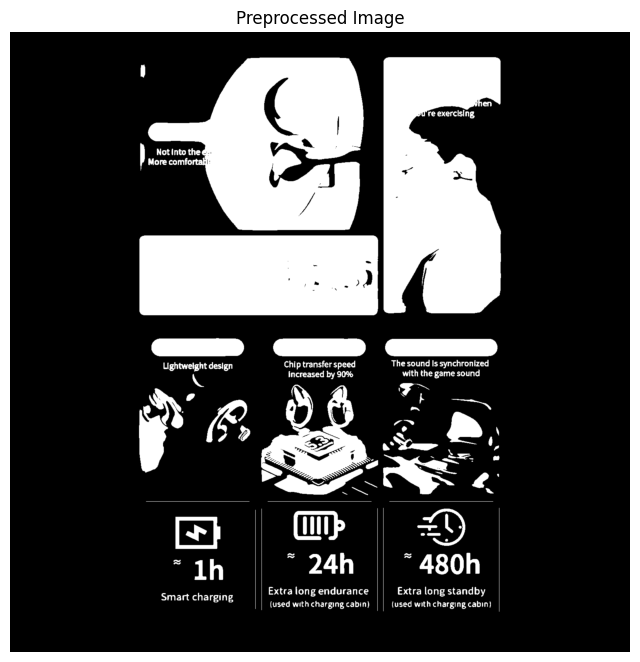


Filtered Terms Based on Category 'item_weight':
[]


Extracted Paragraph:
max 60w power delivery fast charging your usb-c laptop 20v/3a (max ) 8p charged 100%

Words Containing Numeric Characters and Units:
60 w
20 v
3 a
8 p


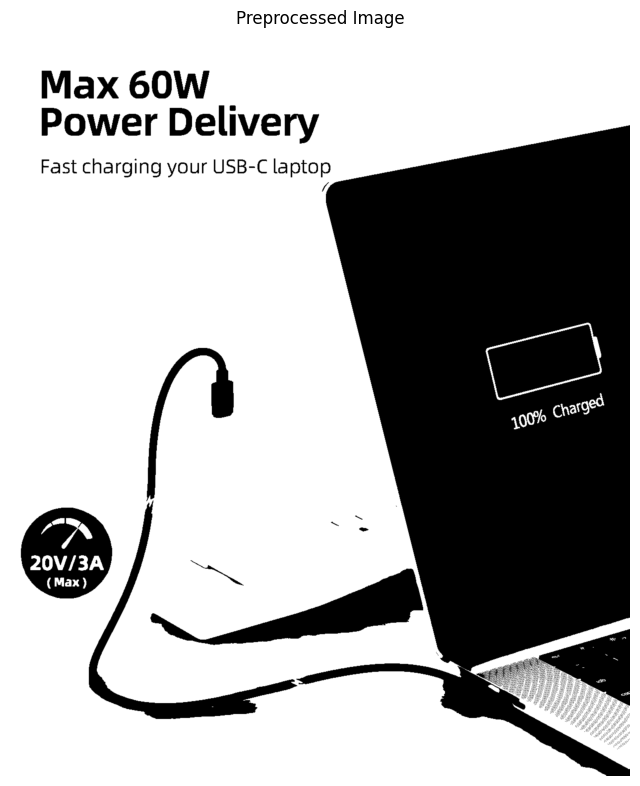


Filtered Terms Based on Category 'wattage':
['60 w']


Extracted Paragraph:
or @ac cable 85-265v 1oow oheatsink and chip @12v -1a power 12v-ia power power adapter supply adapter or led drive 3 assembly display fan drive ta

Words Containing Numeric Characters and Units:
265 v
1 oow
12 v
1 a
12 v
3 assembly


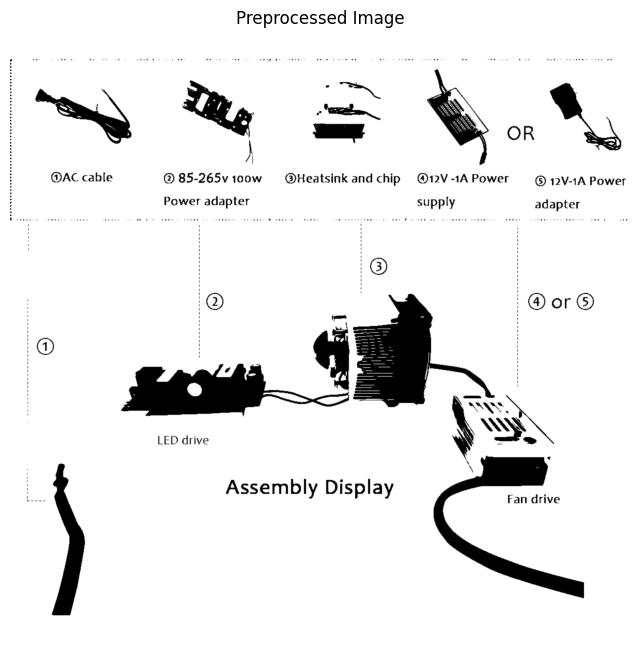


Filtered Terms Based on Category 'voltage':
['265 v', '12 v', '12 v']


Extracted Paragraph:
or @ac cable 85-265v 1oow oheatsink and chip @12v -1a power 12v-ia power power adapter supply adapter or led drive 3 assembly display fan drive ta

Words Containing Numeric Characters and Units:
265 v
1 oow
12 v
1 a
12 v
3 assembly


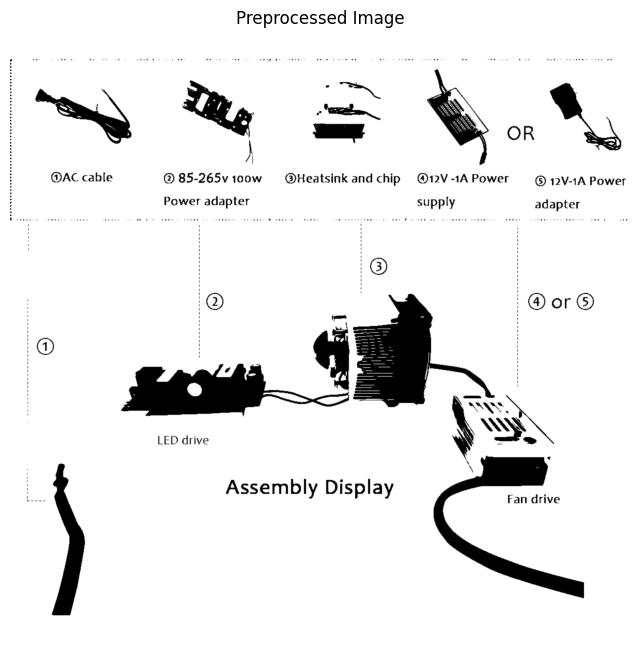


Filtered Terms Based on Category 'wattage':
['1 oow']


Extracted Paragraph:
product information specifications: material: premium beech wood size: 50*13.5*11cm / 19.7*13.5*4.1inch rod diameter: 3.8cm / 1.sinch weight: 2.1kg 4.6lbs load bearing: 300kg / 660lbs large size: 16.9in/43cm 1 3 slua 8 s 19.7in/socm 5.3in/13.5cm

Words Containing Numeric Characters and Units:
11 cm
4.1 inch
3.8 cm
2.1 kg
4.6 lbs
300 kg
660 lbs
16.9 in
43 cm
3 slua
8 s
19.7 in
5.3 in
13.5 cm


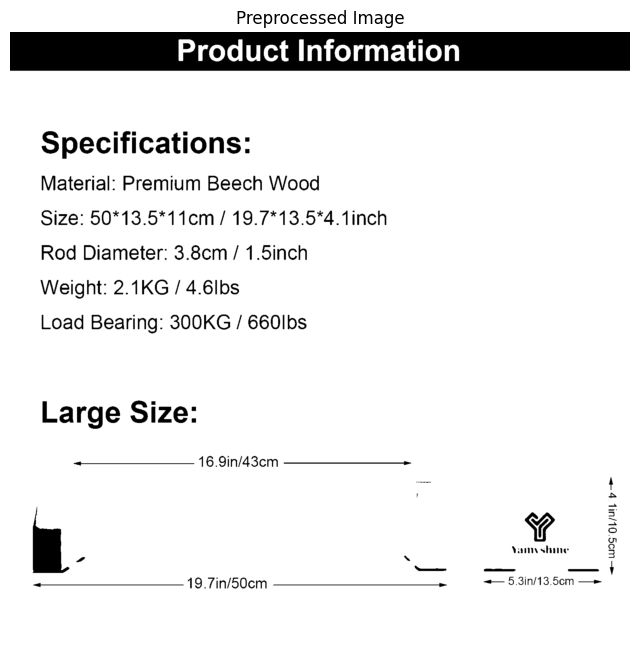


Filtered Terms Based on Category 'item_weight':
['2.1 kg', '4.6 lbs', '300 kg', '660 lbs']


Extracted Paragraph:
product information specifications: material: premium beech wood size: 50*13.5*11cm / 19.7*13.5*4.1inch rod diameter: 3.8cm / 1.sinch weight: 2.1kg 4.6lbs load bearing: 300kg / 660lbs large size: 16.9in/43cm 1 3 slua 8 s 19.7in/socm 5.3in/13.5cm

Words Containing Numeric Characters and Units:
11 cm
4.1 inch
3.8 cm
2.1 kg
4.6 lbs
300 kg
660 lbs
16.9 in
43 cm
3 slua
8 s
19.7 in
5.3 in
13.5 cm


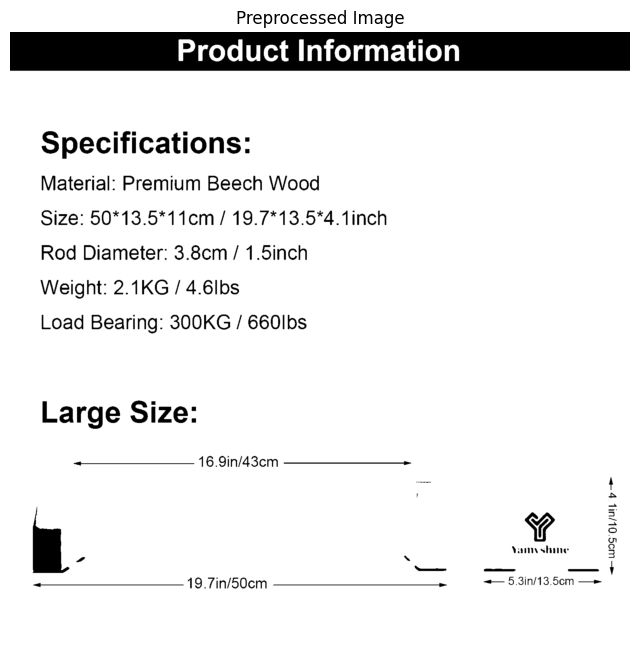


Filtered Terms Based on Category 'maximum_weight_recommendation':
['2.1 kg', '4.6 lbs', '300 kg', '660 lbs']


Extracted Paragraph:
ruedamann applicable to multple equipment wheelchairs cars scooters cleaning robot gapadiy {50008 jf sbuc&

Words Containing Numeric Characters and Units:
50008 jf


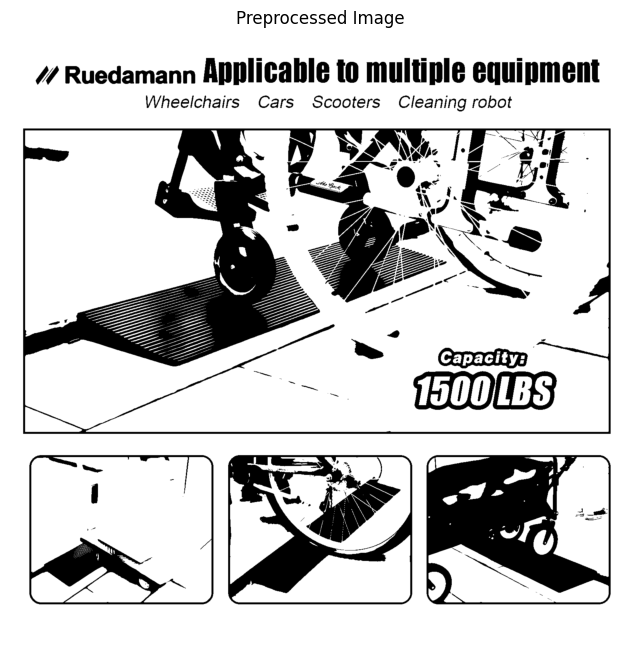


Filtered Terms Based on Category 'maximum_weight_recommendation':
[]


Extracted Paragraph:
"9444 # #:4424! w m [1 m (1 m 6 g{ ihv 16gb (2 x 8gb) ddr4 3200mhz pc4-25600 ecc udimm attention electrostatic sensitive device me25600-818 lifetime warranty h"m -0 # mm# 4n 4 5 5 mtim ;c :

Words Containing Numeric Characters and Units:
1 m
1 m
6 g
16 gb
2 x
8 gb
3200 mhz
25600 ecc
818 lifetime
4 n
5 mtim


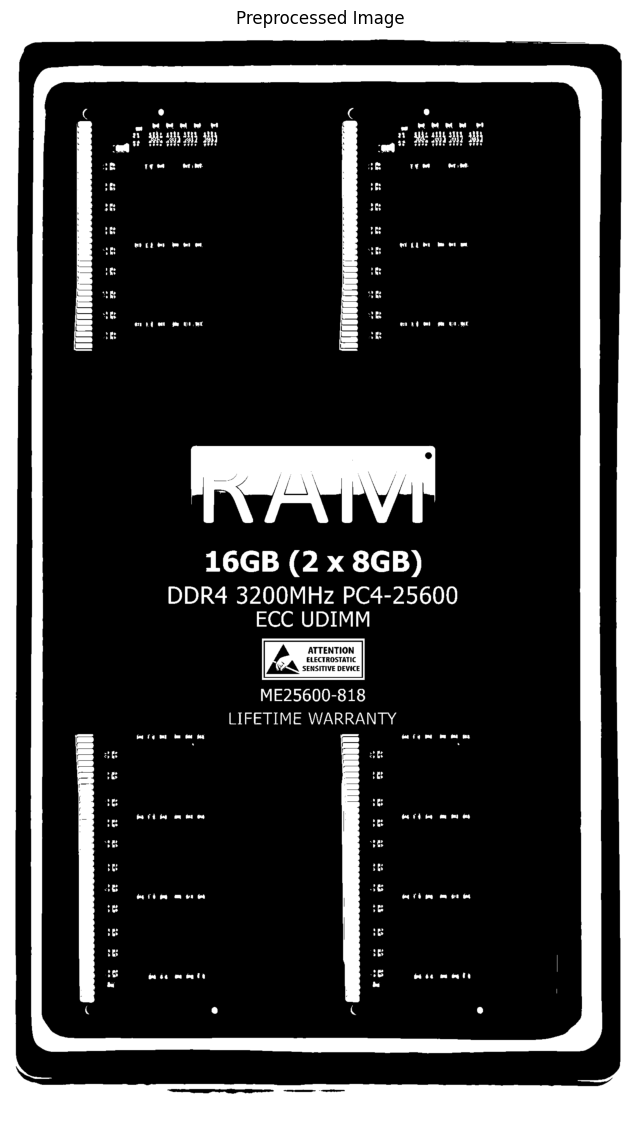


Filtered Terms Based on Category 'voltage':
[]


Extracted Paragraph:
capacity weight 500 lbs

Words Containing Numeric Characters and Units:
500 lbs


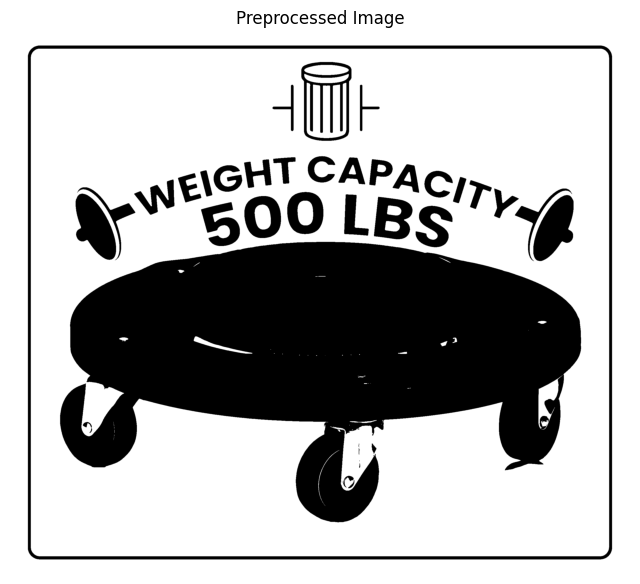


Filtered Terms Based on Category 'maximum_weight_recommendation':
['500 lbs']


Extracted Paragraph:
enjoy sledding fun with your families&friends k lbs @ lbs

Words Containing Numeric Characters and Units:


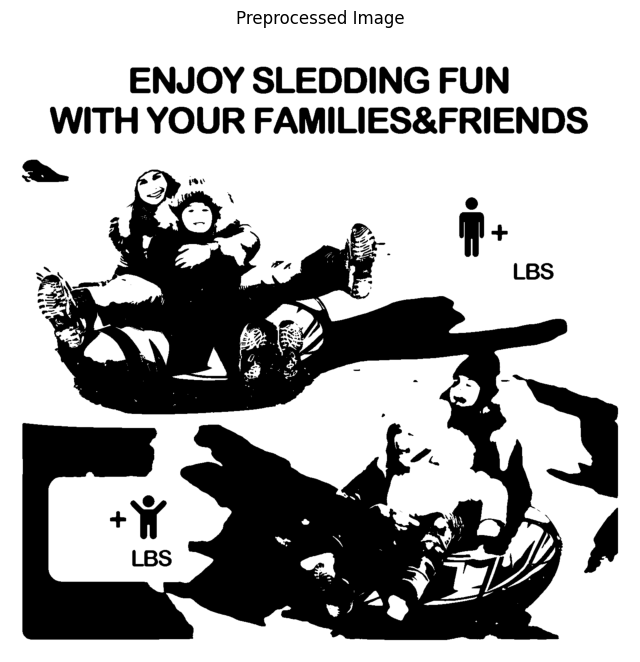


Filtered Terms Based on Category 'maximum_weight_recommendation':
[]


Extracted Paragraph:
enjoy sledding fun with your families&friends k lbs @ lbs

Words Containing Numeric Characters and Units:


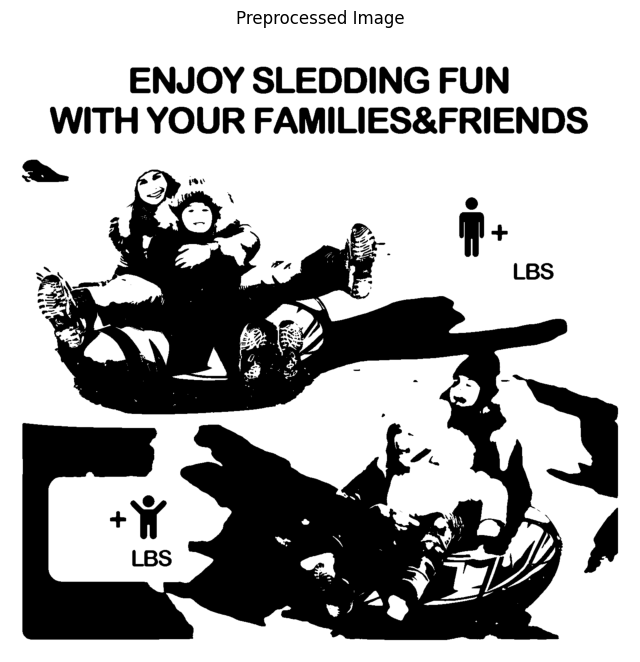


Filtered Terms Based on Category 'item_weight':
[]


In [8]:
import requests
import numpy as np
import cv2
def download_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        image_array = np.frombuffer(response.content, np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
        return image
    else:
        raise ValueError(f"Failed to download image from URL: {url}")
import pandas as pd
df = pd.read_csv('/content/sample_test.csv')

# Apply the function and create a new column 'prediction'
df['prediction'] = df.apply(lambda row: process_image_for_units(download_image(row['image_link']), row['entity_name']), axis=1)

# Save the DataFrame with predictions to a new file
df.to_csv('/content/dataset_with_predictions.csv', index=False)